---

# A.I. for Astrophysics Masterclass - Classifying Pulsars

A Jupyter notebook containing a machine learning tutorial for Pulsar classification. The notebook was written to support a masterclass delivered to students at Edge Hill University on November 14th 2019.

Version 1.0 (28/10/2019)

---

## Author

[Dr. Robert Lyon](mailto:robert.lyon@edgehill.ac.uk)

[Lecturer](https://www.edgehill.ac.uk/computerscience/people/academic-staff/robert-lyon/) @ Edge Hill University, [Department of Computer Science](https://www.edgehill.ac.uk/computerscience/). 

Also see [www.scienceguyrob.com](www.scienceguyrob.com).

If using/editing this resource, please cite it appropriately using the DOI: .

<br/>

Remember if you find this resource useful, you can let me know via social media [<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/general/TwitterLogoBlue.png" width="30">](https://twitter.com/scienceguyrob?lang=en)
                                                                   
---

## License
The code and the contents of this notebook are released under the [GNU GENERAL PUBLIC LICENSE](https://www.gnu.org/licenses/gpl-3.0.en.html), Version 3, 29 June 2007. Any videos linked to are exempt from this, please check the license provided by the video content owners if you would like to use them. If reusing this material, please cite it appropriately.

---

## <a id="Contents"></a> Table of Contents

1. [Introduction](#Introduction)

    1.1 [Who is this for?](#who)
    
    1.2 [Aims](#aims)
    
    1.3 [Tools](#tools)
    
    1.4 [Using this Resource](#using)
    
      * [Introducing Notebooks](#introducingnotebooks)
      
      * [Using this Notebook](#usingthisnotebook)
      
      * [Using Google Colab](#usinggooglecolab)
      
      * [Your own Environment](#ownenvironment)
        
2. [Python Primer](#PythonPrimer)

    2.1 [Comments](#PythonComments)
    
    2.2 [Variables](#PythonVariables)
    
    2.3 [Casting](#PythonCasting)
    
    2.4 [Strings](#PythonStrings)
    
    2.5 [Immutability](#PythonImmutability)
    
    2.6 [Indentation](#PythonIndentation)
    
    2.7 [Lists](#PythonLists)
    
    2.8 [Dictionaries](#PythonDictionaries)
    
    2.9 [Python Operators](#PythonOperators)
    
    2.10 [If-Else](#PythonIfElse)
     
    2.11 [While Loops](#PythonWhile)
    
    2.12 [For Loops](#PythonFor)
    
    2.13 [Functions](#PythonFunctions)
    
    2.14 [Scope](#PythonScope)

3. [A.I. and Machine Learning](#aiandml)

    3.1 [Overview](#mloverview)
    
    3.2 [Applications of Machine Learning](#aiapplications)
    
    3.3 [Importance of Machine Learning](#importanceofml)
    
    3.4 [Learning and Experience](#learningexplained)
    
    3.5 [Classification](#classification)
    
    3.6 [Automated Learning](#mlkeyconcepts)
    
      * [Generative Learning](#generative)
      
      * [Discriminative Learning](#discriminative)
      
      * [Unsupervised Learning](#unsupervised)
      
      * [Evaluation](#evaluation)
      
    3.7 [Summary](#mlsummary)


4. [Masterclass](#masterclass)

    4.1 [Data Introduction](#dataintro)
    
    4.2 [Plotting Data](#dataplots)
    
    4.3 [Standardising Data](#datastandardising)
    
    4.4 [Pulsar Data](#pulsardata)
    
    4.5 [datapreprocessing](#datapreprocessing)
    
    4.6 [Feature Extraction](#featureextraction)

    4.7 [Building Training and Test sets](#buildingtrainandtest)
    
    4.8 [Building Classifiers](#builingclassifiers)
    
    4.9 [Evaluating Classifiers](#evaluatingclassifiers)
    
5. [References](#references)
---

## <a id="Introduction"></a>1. Introduction

In this "masterclass" we'll use techniques from the field of Artificial Intelligence (A.I.), to process real telescope data with the aim of accurately categorising [variable stars](https://en.wikipedia.org/wiki/Variable_star). In doing this you’ll begin to understand how A.I. can be applied in the real-world. You’ll also become comfortable building your own basic machine learning workflows in Python. You may even pick up some astrophysics knowledge along the way, which I hope you'll find interesting. It is worth noting that the content below is designed to be delivered in person, alongside supporting presentation slides. However, I've provided lots of additional material below to make the content accessible to those not attending the masterclass, enabling off-line participation.

<br/>



### <a id="who"></a>1.1 Who is this tutorial for?

The content below was written for complete novices. It makes no assumptions regarding prior knowledge or programming experience. This makes it suitable for first year undergraduates studying Computing, Data Science, or even Physics/Astrophysics.

<br/>


### <a id="aims"></a>1.2 Aims

This tutorial has some ambitious aims:

* to introduce students to the basic ideas underpinning artificial intelligence and machine learning.
* to teach students the Python skills required to build basic machine learning pipelines with [Scikit-learn](https://scikit-learn.org/stable/) (a Python based machine learning library). This **will** require some self-study if a complete newcomer to Python.
* to teach students how to:
    * read in data from file resources.
    * pre-process data for use by machine learning algorithms.
    * extract features from data (and some basic feature extraction concepts).
    * train, test and apply basic machine learning models.
    
<br/>


### <a id="tools"></a>1.3 Tools
Python 3.6 code provided in this [Jupyter notebook](https://jupyter.org/). To make full use of the notebook, you'll require the following Python libraries:

* [Imbalanced-Learn](https://imbalanced-learn.readthedocs.io/en/stable/)
* [Numpy](https://numpy.org/)
* [Matplotlib](https://matplotlib.org/)
* [Pandas](https://pandas.pydata.org/)
* [Scikit-learn](https://scikit-learn.org/stable/)
* [Scipy](https://www.scipy.org/)

<br/>

### <a id="using"></a>1.4 Using this Resource
The following sections explain how to use this resource in more detail.

<br/>


#### <a id="introducingnotebooks"></a> 1.4.1 Introducing Notebooks

The resource you're currently reading is called an [IPython](https://en.wikipedia.org/wiki/IPython) notebook. IPython notebooks, or just notebooks for short, are documents that contain executable code mixed with rich text. The code and text is contained within separate executable 'cells'. Their contents can be displayed (text cells) or code run (code cells) upon execution. 

<br/>

Notebooks are 'interactive' resources. That is, you can execute cells independently, in any order, in an interactive fashion.  This is significantly different from writing regular code where,

1. you'd write your code in a single file.
2. you'd compile it (or interpret it in Python/Java etc).
3. you'd execute it (which happens sequentially line by line). 

The notebook provides a wrapper that hides these steps. When you execute code in a cell, the code is passed to the Python interpreter and executed. Crucially, the variables and functions defined in a cell become available to all other cells after execution. By combining cells, you can then build complex applications. But the main reason we use notebooks is because they are great for teaching. I can provide text explaining the code, then you can execute the code for yourself, seeing the results in real-time. If this doesn't make sense yet don't worry - examples will be provided to make things clearer.

<br/>


#### <a id="usingthisnotebook"></a> 1.4.2 Using this Notebook

There are two main ways you can execute this notebook's contents.

1. [Google Colab](https://colab.research.google.com/) - this is the default option for those attending the masterclass in person. Can also be used by those that didn't attend (no access restrictions).
2. Your own install of [Jupyter Notebooks](https://jupyter.org/) - those that don't wish to use the Google Colab environment can use their own Jupyter install. However, if taking this option, you'll have to ensure you install the required libraries ([Imbalanced-Learn](https://imbalanced-learn.readthedocs.io/en/stable/), [Numpy](https://numpy.org/), [Matplotlib](https://matplotlib.org/), [Pandas](https://pandas.pydata.org/), [Scikit-learn](https://scikit-learn.org/stable/), [Scipy](https://www.scipy.org/)).


More details regarding each option are provided in the sections below.

<br/>

#### <a id="usinggooglecolab"></a>1.4.3 Using Google Colab

[Google Collaboratory](https://colab.research.google.com/) (Google Colab, or just Colab) provides an online development environment. It contains all the tools necessary to write and execute Python programs. To use the Collaboratory you’ll need a google account, e.g. a Gmail Account. When you login to the Collaboratory, it creates a cloud computer just for you. 

1. Open Google Chrome **(Colab only runs in Chrome, [download](https://www.google.com/chrome/) Chrome if needed)**.
2. Login to the Google Colab environment using a valid Google account ([create one](https://accounts.google.com) if you don't have a Google account).
3. Next create **your** own copy of this resource. That way you can edit it any way you please. To do this, click the **"File"** menu at the top of the screen.
4. Click the menu option that says **"Download .ipynb"**. This will download the notebook resource to your personal computer.
5. Once the download has completed, rename the downloaded file so you know what it is - for example, *"my work.ipynb"*. **Keep** the file extension **".ipynb"** in the file name.
6. Now upload the renamed file to the Colab environment so you can edit/run it. To do this, click the **"File"** menu, then click **"Upload Notebook"**. Use the file chooser that appears, to select your file.
7. The notebook should load into your browser window. This is now **your** notebook. Any changes made will not impact anybody else.
8. The notebook is made up of cells. To run the code inside the cells, we must **"execute"** these cells. This is easy to do. Simply hover your mouse over the left most end of a cell containing code. A small **"play"** button will appear. Click this play button to execute the code. 

<br/>

I advise that you step through each cell in this notebook slowly, at your own pace. Once you understand each cell, move on. This is important, as each cell builds upon the next. Remember, each cell is supposed to be executed in turn - from the top to the bottom of the notebook. So, keep that in mind!

<br/>

The cell below contains code that loads a YouTube video that explains a little more about Google Colab. Mostly how to use it. Execute the cell below, then watch the video before proceeding.


In [7]:
# You may be wondering why there is code in this cell. This is needed to
# to show video resources.
#
# You see, Colab notebooks weren't written with displaying videos in mind. But, 
# we can import a Python package that allows us to do this. That's what I 
# do here:

from IPython.display import IFrame
# Then the code below actually shows the video. Don't worry about understanding
# this code. I just include this explanation for the curious.
IFrame(src='https://www.youtube.com/embed/inN8seMm7UI', width=560, height=315)


<br/>

#### <a id="ownenvironment"></a>1.4.4 Your own Environment
There are a few different ways to setup a working notebook environment. Unfortunately, I don't have time to cover them all! If determined to avoid the Colab, there is one approach that I suggest you take - this involves installing [Anaconda](https://www.anaconda.com/). For those who already have anaconda, instructions for creating a suitable environment are provided below.

**Don't currently have Anaconda**

1. Download the appropriate version of Anaconda from the [download site](https://www.anaconda.com/distribution/).
2. Run the installer and follow the install instructions provided [here](https://docs.anaconda.com/anaconda/install/).
3. Once Anaconda is successfully installed, you need to create a conda environment.
4. Open the Anaconda Prompt on Windows or the Mac/Linux Terminal as appropriate.
5. At the prompt/terminal run the command: ```conda create -n ai4astromc python=3.6 anaconda```
6. At the prompt/terminal activate the new environment via the command: ```activate ai4astromc```
7. At the prompt/terminal we can install the required packages via the command: ```conda install numpy scipy matplotlib pandas numba jupyter scikit-learn```
8. When prompted by the package installer press: ```Y```
9. At the prompt/terminal we install the final package required via the command:```conda install -c conda-forge imbalanced-learn```
10. When prompted by the package installer press: ```Y```
11. Download this notebook from the Google Colab site. Save the notebook to somewhere on your local machine. The tag ```<DIR>``` represents the absolute path to the directory containing the notebook file. You'll need to update the directory path depending on where you saved the file (e.g. on Windows this might be ```C:\Users\rob\Downloads``` or on Mac/Linux it might be ```/users/rob/downloads```).
12. At the prompt/terminal, navigate to the directory ```<DIR>``` containing this notebook. On Mac or Linux you can do this via the ```cd``` terminal command. I believe the same command can be used in the Anaconda Prompt on Windows.
3. When inside the directory ```<DIR>```, run the command ```jupyter notebook``` at the prompt/terminal. When the Jupyter UI loads in your default web browser, load this notebook by double clicking it in the navigation pane on the left-hand side.  Remember: before starting Jupyter notebooks, ensure you have activated the correct Python environment by running the command in step 6 above.


**Have Anaconda already**
1. At the Anaconda Prompt in Windows or the Mac/Linux terminal, run the command: ```conda create -n ai4astromc python=3.6 anaconda```
2. At the prompt/terminal activate this environment via the command: ```activate ai4astromc```
3. At the prompt/terminal we install the required packages via the command: ```conda install numpy scipy matplotlib pandas numba jupyter scikit-learn```
4. When prompted, press: ```Y```
5. At the prompt/terminal we install the final package required via the command:```conda install -c conda-forge imbalanced-learn```
6. When prompted by the package installer press: ```Y```
7. Download this notebook from the Google Colab site. Save the notebook to somewhere on your local machine. The tag ```<DIR>``` represents the absolute path to the directory containing the notebook file. You'll need to update the directory path depending on where you saved the file (e.g. on Windows this might be ```C:\Users\rob\Downloads``` or on Mac/Linux it might be ```/users/rob/downloads```).
8. At the prompt/terminal, navigate to the directory ```<DIR>``` containing this notebook. On Mac or Linux you can do this via the ```cd``` terminal command. I believe the same command can be used in the Anaconda Prompt on Windows.
9. When inside the directory ```<DIR>```, run the command ```jupyter notebook``` at the prompt/terminal. When the Jupyter UI loads in your default web browser, load this notebook by double clicking it in the navigation pane on the left-hand side.  Remember: before starting Jupyter notebooks, ensure you have activated the correct Python environment by running the command in step 6 above.


The video below will help you get to know Jupyter notebooks, and teach you how to load resources.


In [8]:
from IPython.display import IFrame
# Then the code below actually shows the video. Don't worry about understanding
# this code. I just include this explanation for the curious.
IFrame(src='https://www.youtube.com/embed/3C9E2yPBw7s', width=560, height=315)

<br/>

[Back to table of contents.](#Contents)

---

## <a id="PythonPrimer"></a>2. Python Primer

This section provides a quick Primer for Python - if you're familiar with Python already, head to section 3.

Programming involves writing instructions that orchestrate the actions of a computer and its hardware components. The instructions are written with the aim of accomplishing a specific goal or task. You know this, but what does it mean? 
How is it achieved? We don’t need to delve too deep into computer science to gain a solid understanding.

<br/>


When you write code, you’re providing instructions that can control a [CPU]. Although CPUs are complex devices, we can think of them as simple input/output boxes. They accept input in the form of machine code and produce machine code outputs. To control the CPU, the code you write must be turned into “Machine Code”.  The CPU reads the machine code, and ultimately does as it’s told! For those who are interested, [this video](https://www.youtube.com/watch?v=FkeRMQzD-0Y) explains machine code in a little more detail.


<br/>

How does the code you're about to write link to this? Well, the code you write has to be converted into machine code. This conversion can be achieved in two ways - either via compilation, or interpretation.

**Compiled Programming Languages** 

Some computer programming languages are known as [compiled](https://en.wikipedia.org/wiki/Compiled_language). For each type of CPU, a tool called a compiler is created, that understands its machine code. When you write a piece of code, it is stored in a source code file. This file is then passed to the compiler. The compiler goes through the code file line by line and translates it to machine code. This produces an executable file, that a CPU can run. Languages like ```C``` and ```C++``` are compiled.

**Interpreted Programming Languages** 

Some computer programming languages are known as [interpreted](https://en.wikipedia.org/wiki/Interpreted_language). For each type of CPU, a tool called an interpreter is created, that understands its machine code. When you write a piece of code, it is stored in a source code file. This file is then passed to the interpreter. The interpreter goes through the code file line by line and translates it to machine code. This produces an executable file, that a CPU can run. Some interpreted languages are special, in that they can be interpreted on the fly. That is, you don’t need to interpret an entire source code file to create machine code.  You can interpret single lines of code as you write them if needed. Languages like ```Python``` and ```Ruby``` are interpreted. [This video](https://www.youtube.com/watch?v=I1f45REi3k4) covers the difference between compiled and interpreted in a little more detail.

**Python**
Here we're going to be writing [Python 3](https://en.wikipedia.org/wiki/Python_(programming_language)) code. Thus, we'll need an interpreter capable of running Python code. The Google Colab environment provides this for us. Or if you're using Anaconda and Jupyter notebooks, you'll be using a Python environment and interpreter that you've setup on your own machine.

<br/>

There are many advantages and disadvantages to Python being interpreted. 

<br/>

|Advantages | Disadvantages|
|-----------|--------------|
|The ability to create variables without explaining what they contain (e.g. are variables numbers or strings).|We can’t control where variables are put in memory, making it difficult to write super-efficient programs.|
|The ability to create variables without worrying where they are stored in memory.|Interpreting Python code is slow compared to compiling code – this means Python programs do not run as fast as programs compiled in other languages.|
|The ability to run individual python commands without having to build entire programs.|Because we don’t explicitly tell Python what types our variables are, we can introduce unexpected errors if we’re not careful.|
|The ability to run Python code on any machine with an interpreter (platform independence).||

<br/>


Perhaps you've already written Python code. If not, it's important that we learn from the start to write clear, concise, and easy to maintain code. To help us do this there is a set of standards, some might say guidelines, for writing “good” Python code. The standard was created when a Python Enhancement Proposal (PEP) was approved. PEP 8 defined coding standards which I strongly encourage you to adopt. The code we write here will adhere to this standard as closely as possible – but if you’re ever in doubt about coding styles or conventions – check [the standard](https://www.python.org/dev/peps/pep-0008/).

<br/>


### <a id="PythonComments"></a>2.1. Comments

Why do we comment our code? There are a variety of important reasons.

* To explain how it works.
* To make it easier to read.
* To help make the code easier to maintain, for those who didn’t write it.

It is important to write informative, succinct comments. There are two types of comment:

  * In-line comments
  * And Block comments

<br/>

The hash (#) symbol is used to start a comment. The python interpreter ignores any text following the hash symbol in code.

<br/>

An **in-line comment** explains a single line of code. It may explain the purpose of the line or provide important information and pointers. Such comments should be used only when required. 

<br/>

A **block comment** explains one or more lines of code. Blocks can spread over multiple lines if required, depending on the complexity of the code. If a comment needs more than one paragraph, split the comment up using an empty comment line. 


Follow the cells below and execute them as you go. The code cells will contain comments that explain how/why things are done. Looking through the cells for yourself will get you into the habit of reading code early on.

In [46]:
# This is a single line comment.

# Comment that explains the code below. Here we simply add two numbers.
number_1 = 10
number_2 = 15
result = number_1 + number_2

# Now we have a multiline comment. I often use these to explain code that
# may not be clear. Ideally, we keep such comments succinct. However, I'll 
# break that rule for educational purposes in this notebook.
#
# Below is some code that checks if a character is in a string. If it is
# present, it returns the index corresponding to the position in the string
# where the character was found. For example, if we have the following String:
#
# "Rob"
#
# Then we can view the strings as a collection of characters with specific 
# positions, or indexes, in the string, e.g.
#
# index:   0  1  2
#          |  |  |
#          v  v  v
#        " R  o  b " 
#
# So, if asking for the index of the character "R" in the string, the index
# will be zero.
text = "Rob"
print("Position of R: ", text.find('R'))
print("Position of o: ", text.find('o'))
print("Position of b: ", text.find('b'))


Position of R:  0
Position of o:  1
Position of b:  2


Can you comment the code below? What would you say to explain the code? The answer is provided in a few cells down - but don't look right away!

In [47]:
number_1 = 0
number_2 = 10

while number_1 < number_2:
  number_1 +=1
  
  if number_1 % 2 == 0:
    
    print("number_1 now even:", number_1)

number_1 now even: 2
number_1 now even: 4
number_1 now even: 6
number_1 now even: 8
number_1 now even: 10


My comments are below. Different people will write comments in different ways. That's ok, so long as the key pieces of information are conveyed.

In [48]:
# Some simple code that prints out the even numbers between
# the variables number_1 and number_2. The values of these
# variables can be altered as required.
number_1 = -1
number_2 = 10

# While number_1 is less than number_2
while number_1 < number_2:
  number_1 +=1 # increment the value of number_1 by 1.
  
  # If number_1 is even, print that out.
  if number_1 % 2 == 0:
    
    print("number_1 now even:", number_1)

number_1 now even: 0
number_1 now even: 2
number_1 now even: 4
number_1 now even: 6
number_1 now even: 8
number_1 now even: 10


Before we proceed, the main types of comment you can use in Python are summarised in the cell below.

In [ ]:
# This is a single line comment in Python.


'''
This is also a multi-line comment in python.
But we use these sorts of comments to document
specific parts of the code. We'll address this later.
'''


<br/>

[Back to table of contents.](#Contents)

---

### <a id="PythonVariables">2.2 Variables

Variables can be thought of as storage boxes kept in computer memory. The Python interpreter takes care of exactly where in memory that is. We use variables to store all sorts of useful information in our programs. 

<br/>

The Python interpreter figures out what "type" variables are, for us automatically. It is up to us as programmers to ensure we don’t mix the types, in ways that aren’t intended. 

<br/>

Here's a summary of the variable types you should know so far.

<br/>


| Type   | Examples                      | Python Code Example that creates the variable |
|--------|-------------------------------|---------------------|
|Integer |… -2, -1, 0, 1, 2 …            | x = 1               |
|Float   |… -2.1, -1.4, 0.01, 1.2, 2.8...| x = 0.5675          |
|String  |hello                          | x = “hello”         |
|Boolean |TRUE or FALSE                  | x = True            |


<br/>

Below is a video which discusses variables in more detail. Please watch this before you continue.


In [54]:
from IPython.display import IFrame
# Then the code below actually shows the video. Don't worry about understanding
# this code. I just include this explanation for the curious.
IFrame(src='https://www.youtube.com/embed/cQT33yu9pY8', width=560, height=315)

Now we've watched the video, let’s explore variables in more detail - and tackle some challenges. Read through the cell below and execute it when ready - remember to follow the comments for guidance too.

In [49]:
# Let's create some variables, and play with the standard library methods 
# available to us.
#
# The code below creates an integer variable. Remember, integers are
# whole numbers (e.g. -1, 0, 1 etc.).
number_1 = 1

# We can verify the data type of the variable using the type() command:
print("Type of variable 'number_1': ", type(number_1))

# We can also obtain unique identifier for the variable too. To do this we use
# the id() command. When a variable is created, it is assigned a unique 
# identifier by the Python interpreter. This allows the variable to be
# tracked and managed appropriately in memory. The ID is a bit like a national
# insurance number. Better yet, think of the ID as a pointer to a variable that
# is stored in memory somewhere.
print("ID of variable 'number_1': ", id(number_1))


# Now let's try and change the value of number_1
number_1 = 2

# What impact does this have on the variable ID?
print("ID of variable 'number_1' after updating: ", id(number_1))


Type of variable 'number_1':  <class 'int'>
ID of variable 'number_1':  4533384832
ID of variable 'number_1' after updating:  4533384864


We can see above that changing the value of the variable *number_1* from 1 to 2, changed it's identifier. So, what happened here? Well, changing the variable created a new variable. This new variable is stored in a different location in memory, which the updated ID points to. What happens if we try and change the value back?

In [50]:
# Now let's try and change the value of number_1 back to 1
number_1 = 1

# What impact does this have on the variable ID? Compare the value of
# the ID to the value first reported above.
print("ID of variable 'number_1' after changing back: ", id(number_1))


ID of variable 'number_1' after changing back:  4533384832


We find that the ID has returned to the original value outputted. This shows that the original value of *number_1* is still in memory, and now we're simply pointing back to it. This becomes important in situations where we need to write efficient programs that use as little memory as possible - for example, when writing applications for mobile devices. So be aware of the variables you declare and how much memory you're using. Only use the variables you actually need. Now we explore some other variables.

In [51]:
# The code below creates a floating-point variable (a float). Remember, floats
# are numbers with fractional components (e.g. -1.21, 0.001, 1.483 etc.).
number_1 = 1.999

# We can verify the data type of the variable using the type() command:
print("Type of variable 'number_1': ", type(number_1))

# The code below creates a string variable (a str). Remember, strings
# are just textual variables.
text = "a string"

# We can verify the data type of the variable using the type() command:
print("Type of variable 'text': ", type(text))

# Strings support other functions, which can tell us something about their 
# characteristics. One such function is the len() command. It returns the
# length of the string. 
print("Length of variable 'text': ", len(text))


Type of variable 'number_1':  <class 'float'>
Type of variable 'text':  <class 'str'>
Length of variable 'text':  8


There's a handy function *isinstance()* that can help you determine what type a variable is.

In [52]:
text = "string"
number_1 = 1
number_2 = 1.0

print("Is 'text' of the string type?: ", isinstance(text,str))
print("Is 'number_1' of the int type?: ", isinstance(number_1,int))
print("Is 'number_2' of the float type?: ", isinstance(number_2,float))
print("Is 'number_1' of the float type?: ", isinstance(number_1,float))

Is 'text' of the string type?:  True
Is 'number_1' of the int type?:  True
Is 'number_2' of the float type?:  True
Is 'number_1' of the float type?:  False


<br/>

[Back to table of contents.](#Contents)

---

### <a id="PythonCasting">2.3. Casting

We can convert variables to other data types by '[casting](https://en.wikipedia.org/wiki/Type_conversion)' them. This process is straightforward but may seem confusing at first. Please watch the video below before you continue.

In [55]:
from IPython.display import IFrame
# Then the code below actually shows the video. Don't worry about understanding
# this code. I just include this explanation for the curious.
IFrame(src='https://www.youtube.com/embed/ALvbltAPOcI', width=560, height=315)

Now we apply our understanding of casting. Read through the code below then execute it.

In [56]:
# First, we declare an integer variable, and print out it's details.
number_1 = 1
print("Type of variable 'number_1': ", type(number_1), " Value:", number_1)


# Now we cast the integer variable to a float and print out it's details.
number_2 = float(number_1)
print("Type of variable 'number_2': ", type(number_2), " Value:", number_2)


# Alternatively, we can cast the integer to a string.
text = str(number_1)
print("Type of variable 'text': ", type(text), " Value:", text)

# We can always convert back from a string type to an integer type.
number_1 = int(text)
print("Type of variable 'number_1': ", type(number_1), " Value:", number_1)


Type of variable 'number_1':  <class 'int'>  Value: 1
Type of variable 'number_2':  <class 'float'>  Value: 1.0
Type of variable 'text':  <class 'str'>  Value: 1
Type of variable 'number_1':  <class 'int'>  Value: 1


In the cell above we have some examples of casting. Everything is easy and straightforward. But things can become difficult when trying to cast numerical values as shown in the cell below.

In [57]:
# When casting floats to integers we lose the fractional components.
# For example,...
number_1 = 1.6732
print("Type of variable 'number_1': ", type(number_1), " Value:", number_1)

# Now cast inside the print statement.
print("Type of variable 'number_1': ", type(number_1), " Value:", int(number_1))

# When the print statement above runs, we loose the .6732, and the variable is
# rounded down to the nearest whole integer.

Type of variable 'number_1':  <class 'float'>  Value: 1.6732
Type of variable 'number_1':  <class 'float'>  Value: 1


You might think that this isn't a big issue - after all, just ensure we cast types correctly, and the problems go away. In principle this is true, but sometimes we can get unexpected behaviours when casting. Or we may have input data that we need to cast, but can't without some extra processing. Let’s explore some of these issues below.

In [58]:
# What type is the variable declared below?
number_1 = 1 * 1.0

# When running this print statement, we find that Python has automatically
# determined that the variable is a float. Which is great.
print("Type of variable 'number_1': ", type(number_1), " Value:", number_1)

Type of variable 'number_1':  <class 'float'>  Value: 1.0


However sometimes when casting we encounter errors (the error that happens when running the code below is expected!).

In [59]:
# Let's try something different with strings.
text = "1.0" # We can see this is a string containing a float

# Well we can cast this to an int, right?
print("Type of variable 'text': ", type(text), " Value:", text)
print("Casting 'text' to an integer type...")
number_1 = int(text)

Type of variable 'text':  <class 'str'>  Value: 1.0
Casting 'text' to an integer type...


ValueError: invalid literal for int() with base 10: '1.0'

Above we find that we can't directly cast a string containing a float, to an integer. We encounter an error when we try this. The error "invalid literal for int() with base 10: '1.0' " is basically telling us that the value 1.0 is not an integer, thus can't be stored in an integer variable - even though we tried to do the conversion using casting. How to fix this? How about you try that for yourself - the answer is provided below.

In [ ]:
# Try and convert this text variable:
text = "1.0"

# To an integer please. Store it in the variable number_1. Print
# out this variable, and also print out it's type.
print("Casting 'text' to an integer type...")

**Solution**

In [60]:
# Here's our text variable.
text = "1.0"

# Confirm some details about the variable.
print("Type of variable 'text': ", type(text), " Value:", text)
print("Casting 'text' to an integer type...")

# Well we can cast this to an int, right?
number_1 = int(float(text))

# Now print it out.
print("Type of variable 'number_1': ", type(number_1), " Value:", number_1)

Type of variable 'text':  <class 'str'>  Value: 1.0
Casting 'text' to an integer type...
Type of variable 'number_1':  <class 'int'>  Value: 1


Here's another example you may not have thought about. Suppose we want to work out the average of some numbers. Let's try this and see what happens.

In [61]:
# Here we have some integer numbers.
x = [1 ,2, 3, 4, 5, 6, 7, 8]

# We can use the sum function to add up the numbers in the list.
total = sum(x)

print("Sum of x: ", total)

# Now we know we can obtain the average (the arithmetic mean) by dividing the
# sum, by the number of numbers found in x. In this case, there are 8 numbers.
# We can count the numbers in x using the in-built len() function.
items = len(x)
print("Items in x: ", items)

# So now we work out the average as you might expect. Note I call the variable
# mean, as we are computing the arithmetic mean (aka the average).
mean = total / items
print("Mean of x is: ", mean)
print("Type of 'mean'", type(mean))

Sum of x:  36
Items in x:  8
Mean of x is:  4.5
Type of 'mean' <class 'float'>


Here we can see that when we calculated the mean, we divided an integer value (total), by another integer value (items). This created a float variable with the answer.


<br/>

In previous versions of Python (before Python 3), this same code would have returned an integer value of 4. This wouldn't be correct, as the answer is 4.5. 

<br/>

Python 3 has been improved to help stop such mistakes from happening. However, I'm telling you about them, as perhaps one day you'll be asked to work with older Python code. In Python 2, to get the correct answer you would have to explicitly cast the variables like so:



```
mean = float(total) / float(items)
```



<br/>

[Back to table of contents.](#Contents)

---

### <a id="PythonStrings"> 2.4. Strings

String variables store textual information. You already know that you can print them:

```
print(“A string”)
```

You may know that you can access individual characters in the string using the following notation:


```
text = “Hello”
print(text[0]) # Prints out ‘H’
```


You may also know you can access whole parts of strings using “slicing”. We can do this with the following notation:

```
print(text[0:2]) # Prints out ‘He’
```

Watch the following video describing strings before you continue. 



In [62]:
from IPython.display import IFrame
# Then the code below actually shows the video. Don't worry about understanding
# this code. I just include this explanation for the curious.
IFrame(src='https://www.youtube.com/embed/Ctqi5Y4X-jA', width=560, height=315)

We can interact with some strings in the cell below. Read the code, then run it when ready.

In [63]:
# We can print string literals.
print("hello")

# We can print numbers.
print(1)

# We can print the output of functions
print(type(1))

# We can get the print statement to evaluate code for us.
print(1+2)

# We can get the print statement to combine strings.
print("1" + "2")

# We can get the print out more complicated messages.
name = "Rob"
employer = "Edge Hill University"

# Note here we use commas to add together (concatenate) strings.
print("My name is:", name, " My employer is:", employer)

hello
1
<class 'int'>
3
12
My name is: Rob  My employer is: Edge Hill University


We can see above we can create and print strings in a variety ways. But you may be interested to know that strings are not like most other variables - strings are actually objects in Python. They act a little bit like some other objects you'll learn about soon, that what we call lists or arrays. Read through the code below to find out more.

In [64]:
# Strings - we all know about simple strings. For example,

text = "I am a string variable"

'''
But what's interesting is that Strings are arrays. What is an array?
An array is a data structure that can store data. An array of length
1 contains exactly 1 piece of information. An array of length 2 contains
2 pieces and so on. We can represent strings simply, to help our understanding:

[] is an empty array

['1'] is an array containing 1 'element' (data item), which in this case is a
      string literal containing the character '1'.
      
[1,2,3] is an array containing three numerical values, 1, 2, and 3.

Arrays are 'indexed' - that is, each element in the array has a number
corresponding to it. For example...

Index =    0     1     2
           |     |     |
           v     v     v
         [ 1  ,  2  ,  3]
         

Notice the indexing starts with 0. So the first element in any array, is
at an index of zero. How does this relate to strings?
'''

# Here's a string, which we now know is an array of items
text = "Rob"

# We can print the whole array
print("Here's what the text contains", text)

# Or we can print just a specific element of an array
print("Printing element 0 returns:", text[0])

# Or 
print("Printing element 2 returns:", text[2])

# We can also obtain the length of the array.
print("The length of the array is: ",text)

# We can also 'slice' an array. This allows us to return a portion
# of the string array, for example:
print("Slicing positions 0 to 1 gives us: ", text[0:1])

# or what about...
print("Slicing positions 1 to 2 gives us: ", text[1:2])

# Execute this cell once you get here.


Here's what the text contains Rob
Printing element 0 returns: R
Printing element 2 returns: b
The length of the array is:  Rob
Slicing positions 0 to 1 gives us:  R
Slicing positions 1 to 2 gives us:  o


Above we learned that strings are stored like arrays in memory. Each character in the string can be uniquely identified by it's index location, in the array. But what happens when we try to access an index that may not exist? Read through the cell below, then run it to find out.

In [65]:
'''
What happens if we try to reference an element outside of the array? 
Well, we get an error message. When we reference an element outside of an
array, we're asking the Python interpreter to return some information that
isn't there - all it can do is return an error. For example...
'''

# Here's a string, which we now know is an array of items
text = "Rob"

print(text[3])


IndexError: string index out of range

Above we got an "index out of range" error. This is Python's way of telling you that you've tried to access part of an array that doesn't exist. Get familiar with error messages like that. But can we stop them from occurring? Read the cell below, then run it when you think you understand what will happen.

In [66]:
'''
Get familiar with error messages - us programmers
encounter them on a daily basis. Don't see them as negative outcomes. See them
as a way of learning to improve your code. Each error you fix, the better
it gets! For instance, in the future we could write something like the 
following:
'''

# Store the index we want to obtain the value at.
index = 3

# Create the text.
text = "Rob"

# Check that the index is inside the array - if it isn't return an error
# message. This is an error message of our own creation, not an error raised
# by the Python interpreter telling us we made a mistake. 
if index >= len(text):
  print("That index points outside of the array, I can't return that value!")
else:
  # We can print the index as it is less than the array length.
  print("The character as position: ", index , " is: ", text[index])


That index points outside of the array, I can't return that value!


What happens in the code above if the index is less than zero? Modify the code so that,


```
index = 0
```

Then run the code. You encounter an error again. Can you fix this? Edit the cell below and try to make it work. A solution is provided further down the notebook (below the code cell) - but only check the solution if you’re really stuck!

In [ ]:
'''
Edit for yourself...
'''

# Store the index we want to obtain the value at.
test_index = ?

# Create the text.
text = "Rob"

# Check that the index is inside the array - if it isn't return an error
# message, but we don't actually encounter an error
if test_index >= len(text):
  print("That index points outside of the array, I can't return that value!")
else:
  print("The character as position: ", test_index , " is: ", text[test_index])

SyntaxError: ignored

**Solution**

In [67]:
'''
Solution
'''

# Store the index we want to obtain the value at.
# Edit this value to test that it works.
test_index = 3

# Create the text.
text = "Rob"

# Check that the index is inside the array - if it isn't return an error
# message, but we don't actually encounter an error
if test_index >= len(text) or test_index < 0:
  print("That index points outside of the array, I can't return that value!")
else:
  print("The character as position: ", test_index , " is: ", text[test_index])
  
  
'''
For those who like a challenge - how about trying to understand what I do below.
Here I create a function that can check if any index is outside of any specified
string array.
'''

def isInside(index, text):
  if index >= len(text) or index < 0:
    print("That index points outside of the array, I can't return that value!")
    return False
  else:
    print("The character as position: ", index , " is: ", text[test_index])
    return True
  

array = "Hello"
index = 1

print("Is ", index , " inside the array? ", isInside(index, array))

index = 6

print("Is ", index , " inside the array? ", isInside(index, array))


That index points outside of the array, I can't return that value!
The character as position:  1  is:  l
Is  1  inside the array?  True
That index points outside of the array, I can't return that value!
Is  6  inside the array?  False


Strings have lots of other useful functions associated with them. Some of these are summarised in the table below. 

|Method|Description|
|------|-----------|
|capitalize()|Converts first character to Capital Letter|
|center()|Pads string with specified character|
|count()|returns occurrences of substring in string|
|endswith()|Checks if String Ends with the Specified Suffix|
|find()|Returns the index of first occurrence of substring|
|isalnum()|Checks Alphanumeric Character|
|isalpha()|Checks if All Characters are Alphabets|
|islower()|Checks if all Alphabets in a String are Lowercase|
|isnumeric()|Checks Numeric Characters|
|isupper()|returns if all characters are uppercase characters|
|lower()|returns lowercased string|
|upper()|returns uppercased string|
|replace()|Replaces Substring Inside|
|split()|Splits String from Left|
|rsplit()|Splits String From Right|
|startswith()|Checks if String Starts with the Specified String|
|len()|Returns Length of an Object|

In the cell below we explore how to use these. Read through the code first, then execute it. Is the output what you expected?

In [68]:
# Suppose we have this string
email = "user1001@somecoolsite.com"
print("The initial string is: ", email)


# Lets test some string functions out on it, to see what happens.

# returns occurrences of substring in string
print("Counting the @ symbols in the string: ", email.count('@'))

# Checks if String Ends with the Specified Suffix
print("Does the string end in .com?: ", email.endswith('.com'))

# Returns the index of first occurrence of substring
print("Find the index of first 'r' char in the string: ", email.find('r'))

# Checks Alphanumeric Character
print("Is the string alpha numeric?: ", email.isalnum())

# Checks if All Characters are Alphabets
print("Are all the characters in the string letters?: ", email.isalpha())

# Checks if all Alphabets in a String are Lowercase
print("Is the string lower case?: ", email.islower())

# Checks Numeric Characters
print("Is the string entirely numeric: ", email.isnumeric())

# returns if all characters are uppercase characters
print("Are all the characters uppercase?: ", email.isupper())

# Checks if String Starts with the Specified String
print("Does the string start with 'user'?: ", email.startswith('user'))



The initial string is:  user1001@somecoolsite.com
Counting the @ symbols in the string:  1
Does the string end in .com?:  True
Find the index of first 'r' char in the string:  3
Is the string alpha numeric?:  False
Are all the characters in the string letters?:  False
Is the string lower case?:  True
Is the string entirely numeric:  False
Are all the characters uppercase?:  False
Does the string start with 'user'?:  True


The code above doesn't alter the string or create new strings from it. It just provides information relating to the string that can be very useful. The code below shows how to generate some new strings, from the input string. Read through the code, then execute it.

In [69]:
# Suppose we have the same string again.
email = "user1001@somecoolsite.com"
print("The initial string is: ", email)

# We can now create new strings from this input using
# a variety of standard in-built string methods. 

# Converts first character to Capital Letter
email_updated = email.capitalize()
print("Capitalised first character: ", email_updated) 

# Pads string with specified character
email_updated = email.center(5,"#")
print("Padding with the # char: ", email_updated)

# returns lowercased string
email_updated = email.lower()
print("Converted to lowercase: ", email_updated)

# returns uppercased string
email_updated = email.upper()
print("Converted to uppercase: ", email_updated)

# Replaces Substring Inside
email_updated = email.replace('user','person')
print("The text 'user' replaced with 'person': ", email_updated)

# Splits String from Left
email_updated = email.split('@')
print("\nSplitting the string into two on the '@' symbol: ", email_updated)
print("The variable created by splitting is not a string: ", type(email_updated))
print("Length of the new list: ", len(email_updated))



The initial string is:  user1001@somecoolsite.com
Capitalised first character:  User1001@somecoolsite.com
Padding with the # char:  user1001@somecoolsite.com
Converted to lowercase:  user1001@somecoolsite.com
Converted to uppercase:  USER1001@SOMECOOLSITE.COM
The text 'user' replaced with 'person':  person1001@somecoolsite.com

Splitting the string into two on the '@' symbol:  ['user1001', 'somecoolsite.com']
The variable created by splitting is not a string:  <class 'list'>
Length of the new list:  2


How about trying to solve some string challenges using those methods. Here's a list of things I'd like you to try.

1. Get the first character in string, print it out.
2. Get the last character in string, print it out.
3. Get the middle word in string, print it out.
4. Use slicing to get the substring "awe" from the input.
5. Return the first index of the '_' character in the string.
6. Return the last index of the '_' character in the string.

Try to do this in the cell below. A solution is provided further down.

In [ ]:
# Here's the string to use:
text = "testing_your_awesome_python_skills"

# Write your code here.

**Solution**

In [70]:
# Here's the string to use:
text = "testing_your_awesome_python_skills"

# 1. Get the first character in string, print it out.
print("First character:", text[0])

# 2. Get the last character in string, print it out.
print("Last character:", text[len(text)-1])

# 3. Get the middle word in string, print it out.
words = text.split('_')
print("Middle word:", words[2])

# 4. Use slicing to get the substring "awe" from the input.
# Well, I already have the middle word which obtained above.
# So I just need to get the first three characters from that string.
print("Getting 'awe':", words[2][0:3])

# 5. Return the first index of the '_' character in the string.
print("First index of '_':", text.index('_'))

# 6. Return the last index of the '_' character in the string.
print("Last index of '_':", text.rindex('_'))

First character: t
Last character: s
Middle word: awesome
Getting 'awe': awe
First index of '_': 7
Last index of '_': 27


<br/>

[Back to table of contents.](#Contents)

---


### <a id="PythonImmutability">2.5. Immutability

In Python, strings are immutable. This means that once they’re created, they can’t be changed. This may seem strange, as you probably feel like you’ve changed strings in your code.

<br/>

In reality all strings you create are put in memory and do not change. It’s important we know this, otherwise we might introduce errors into our code. Actually, many Python objects are immutable – but there are exceptions. We can see in the table below that booleans, integers, floats, strings and the frozen set class are immutable. 

<br/>


| Type      | Immutable |
|-----------|-----------|
|Boolean    |  Yes      |
|Int        |  Yes      |
|Float      |  Yes      |
|String     |  Yes      |
|FrozenSet  |  Yes      |
|List       |  No       |
|Set        |  No       |
|Dict       |  No       |

<br/>

Please watch the video below about immutable objects before you continue. If you have any trouble understanding the content, here are some links that may help too:

[Link 1](https://dev.to/himankbhalla/why-should-i-care-about-immutables-in-python-4ofn)

[Link 2](https://towardsdatascience.com/https-towardsdatascience-com-python-basics-mutable-vs-immutable-objects-829a0cb1530a)

[Link 3](https://medium.com/@meghamohan/mutable-and-immutable-side-of-python-c2145cf72747)

[Link 4](https://medium.com/@tyastropheus/tricky-python-i-memory-management-for-mutable-immutable-objects-21507d1e5b95)

In [71]:
from IPython.display import IFrame
# Then the code below actually shows the video. Don't worry about understanding
# this code. I just include this explanation for the curious.
IFrame(src='https://www.youtube.com/embed/p9ppfvHv2Us', width=560, height=315)

Now we've watched the video, let's explore immutability for ourselves. We've already touched on immutability briefly so the code below may be familiar. Read through the code, then run it.

In [72]:
# Example of immutability in action. First, we set the value of some
# variable which we call x.
x = 8

# Then we set y equal to x. At this point, they should both point to
# the same location in memory.
y = x

# Let's check that is the case.
print("ID of the variable 'x':", id(x))
print("ID of the variable 'y':", id(y))

if id(x) == id(y):
  print("x and y have the same ID - they point to the same place in memory.")

# Now lets change the value of x - what will happen to y?
x = 100

# Does the value of y change?
print("Value of y after x is updated:", y)

# Let's recheck the IDs.
print("ID of the variable 'x':", id(x))
print("ID of the variable 'y':", id(y))

if id(x) == id(y):
  print("x and y have the same ID - they point to the same place in memory.")
else:
  print("x and y do not have the same ID anymore.")

ID of the variable 'x': 4533385056
ID of the variable 'y': 4533385056
x and y have the same ID - they point to the same place in memory.
Value of y after x is updated: 8
ID of the variable 'x': 4533388000
ID of the variable 'y': 4533385056
x and y do not have the same ID anymore.


We've touched upon whats happening above before. When we try to update a variable directly, Python simply creates a brand new variable. There's another example of this below.

In [73]:
# More immutability.

x = 89
print("Id of the variable x: ",id(x))


# Simply increase x by 1.
x = 89 + 1

print("Value of x is now: ", x)
print("Id of the variable x: ",id(x))

Id of the variable x:  4533387648
Value of x is now:  90
Id of the variable x:  4533387680


Immutability with simple strings and integer variables is relatively simple. But things get more complicated when dealing with lists - these are mutable (directly changeable). Read the code below, then run it, to see mutability in practice.

In [74]:
# Example equality check
list_1 = [1, 2, 3]
list_2 = [1, 2, 3]

# Now check if the lists are equal to each other
print("Are the lists equal?", list_1 == list_2)

# Above we should find that the lists are equal. But
# are they the same object?
print("Are the lists the same object?", list_1 is list_2)


# What happens if we set list_2 equal to list_1?
list_2 = list_1         

# Now check if the lists are equal to each other
print("Are the lists equal?", list_1 == list_2)

# Now we'll change list_1 by appeding a new value to it.
list_1.append(4)

# Let's print out list_2.
print("Content of list_2: ", list_2)   


Are the lists equal? True
Are the lists the same object? False
Are the lists equal? True
Content of list_2:  [1, 2, 3, 4]


Look through the code above again. Be sure you understand what's going on here.

<br/>

**Exceptions with Immutable Objects**

While it is true that a new object is usually created each time we create a variable, or make references to an existing variable, there are few notable exceptions:

* Some strings.
* Integers between -5 and 256 (inclusive).
* Empty immutable containers (e.g. lists, tuples).

These exceptions arise as a result of some memory optimizations written into the Python interpreter. After all, if two variables refer to objects with the same value, why waste memory creating a new object for the second variable? Why not simply have the second variable refer to the same object in memory?

<br/>

Let’s look at some examples of these exceptions. Read through the code below and execute it when ready.


In [75]:
text_1 = "python is cool!"
text_2 = "python is cool!"

# Now check if the strings are equal to each other
print("Are the strings equal?", text_1 == text_2)

# Above we should find that the strings are equal. But
# are they the same object?
print("Are the strings the same object?", text_1 is text_2)


text_1 = "python"
text_2 = "python"

# Now check if the strings are equal to each other
print("Are the strings equal?", text_1 == text_2)

# Above we should find that the strings are equal. But
# are they the same object?
print("Are the strings the same object?", text_1 is text_2)

# The Python interpreter maintains an array of integers between -5 to 256 in
# memory at all times. Hence, variables referring to an integer within this
# range would be pointing to the same object that already exists in memory:

# Let's test this by creating some variables.
number_1 = 256
number_2 = 256
# Now check if the numbers are equal to each other
print("Are the numbers equal?", number_1 == number_2)

# Above we should find that the numbers are equal. But
# are they the same object?
print("Are the numbers the same object?", number_1 is number_2)


# What about if the numbers sit outside the range specified?
number_1 = 257
number_2 = 257
# Now check if the numbers are equal to each other
print("Are the numbers equal?", number_1 == number_2)

# Above we should find that the numbers are equal. But
# are they the same object?
print("Are the numbers the same object?", number_1 is number_2)


# Empty objects
tuple_1 = ()
tuple_2 = ()

# Now check if the tuples are equal to each other
print("Are the numbers equal?", tuple_1 == tuple_2)

# Are they the same.
print("Are the tuples the same object?", tuple_1 is tuple_2)

# Non-empty objects
tuple_1 = (1,)
tuple_2 = (1,)

# Now check if the tuples are equal to each other
print("Are the numbers equal?", tuple_1 == tuple_2)

# Are they the same.
print("Are the tuples the same object?", tuple_1 is tuple_2)


# List operator immutability issues
list_1 = [1, 2, 3]
print("ID of the list we just created: ", id(list_1))

# Now update the list using the addition operator.
list_1 = list_1 + [4]
print("ID of the list we just updated: ", id(list_1))

# We just got a different object, even though lists are mutable. 
# But why does this happen? The answer lies in the subtle differences behind
#the operators. The addition (+) operator calls the __add__ method (these are 
# methods automatically called instead of having to be explicitly invoked), 
# which does not modify either arguments. 
#
# Hence, the expression list_1 + [4] creates a new object with the value:
#
# [1, 2, 3, 4]
#
# which list_1 on the left-hand side now refers to. On the other hand, the += 
# operator calls __iadd__, that modifies the arguments in place.

Are the strings equal? True
Are the strings the same object? False
Are the strings equal? True
Are the strings the same object? True
Are the numbers equal? True
Are the numbers the same object? True
Are the numbers equal? True
Are the numbers the same object? False
Are the numbers equal? True
Are the tuples the same object? True
Are the numbers equal? True
Are the tuples the same object? False
ID of the list we just created:  140350002572616
ID of the list we just updated:  140349737851272


<br/>

[Back to table of contents.](#Contents)

---

### <a id="PythonIndentation"> 2.6. Indentation
All computer programming languages have some way of indicating where a line, or block of code, finishes. 

In Python, blocks of code are defined using indentation. The Python interpreter treats all text on a line as potential code (excluding comments). To separate code within a loop from code outside, all code within the while loop is indented using space characters. This indentation is done relative to the definition of the while loop.

<br/>

When writing your Python code, you may have encountered problems due to how your code was indented – maybe even errors. Most students new to Python struggle with indentation. But even experienced programmers can make indentation mistakes.

<br/>

Indentation in Python may not be something you've thought about. Perhaps you're using a text editor that takes care of any indentation issues for you. Nonetheless it is important to understand when you have a problem with indentation. Below are some examples of bad indentation. Read each example, then run it. Once you run it, check the output, and consider why the error occurred. If you can, fix the indentation before moving on.

In [76]:
number_1 = 10
number_2 = 0

while number_2 < number_1:
print("The variable 'number_2' is less than 'number_1'.")
number_2 += 2

IndentationError: expected an indented block (<ipython-input-76-5f64a9c28837>, line 5)

What about the version below?

In [78]:
number_1 = 10
number_2 = 0

while number_2 < number_1:
  print("The variable 'number_2' is less than 'number_1'.")
 number_2 += 2

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)

**Solution**

In [79]:
number_1 = 10
number_2 = 0

while number_2 < number_1:
  print("The variable 'number_2' is less than 'number_1'.")
  number_2 += 2

The variable 'number_2' is less than 'number_1'.
The variable 'number_2' is less than 'number_1'.
The variable 'number_2' is less than 'number_1'.
The variable 'number_2' is less than 'number_1'.
The variable 'number_2' is less than 'number_1'.


<br/>

[Back to table of contents.](#Contents)

---

### <a id="PythonLists">2.7. Lists

Python lists are mutable collections. Suppose we have the following list,

```list = [‘r’, ‘o’, ‘b’, ‘!’]```

As lists are mutable, we can change them without creating new objects. For example, if we run the following command,

```list[3] = ‘.’```

then we change the list directly.  There’s so much more you can do with lists. You can,

* Add items to lists using the ```append()``` function.
* Delete items from lists using the ```remove()``` function.
* Add lists together with standard operators such as addition.
* Use in-built functions to find the minimum or maximum elements in a list.
* Count how many times an item occurs in a list.


Please watch the video below before proceeding.






In [80]:
from IPython.display import IFrame
# Then the code below actually shows the video. Don't worry about understanding
# this code. I just include this explanation for the curious.
IFrame(src='https://www.youtube.com/embed/9OeznAkyQz4', width=560, height=315)

No we can play with lists for ourselves. Read the cell below, then execute it.

In [81]:
# Create a list
list_1 = ['a','b', 'c']
print("ID of list: ", id(list_1))
print("Content of list: ", list_1)

# Now change the list
list_1[0] = 'z'
print("ID of list: ", id(list_1))
print("Content of list: ", list_1)

# Add items to lists using the append() function.
list_1.append("this")
list_1.append("that")
list_1.append(1)

print("\nContent of list_1:\n", list_1)


# Delete items from lists using the remove() function.
list_1.remove("this")
print("\nContent of list_1:\n", list_1)

# Add lists together with standard operators such as addition.
list_1 += ["new", "data"]
print("\nContent of list_1:\n", list_1)

# Count how many times an item occurs in a list.
print("\nCounting occurrences of 'new' in list_1:\n", list_1.count("new"))


# Lets make the list data numerical
list_1 = [1,5,8,2,5,2,8,9,23,4,6,22,25,7,16]

# Now we can use in-built functions to find the minimum or maximum
# elements in a list.
print("\nMin list_1:\n", min(list_1))
print("\nMax list_1:\n", max(list_1))

# You can find the min or max values in a character list.
list_1 = ['a', 'b', 'c']
print("\nMin list_1:\n", min(list_1))
print("\nMax list_1:\n", max(list_1))

# You can find the min or max values in a string list.
list_1 = ["a", "b", "c"]
print("\nMin list_1:\n", min(list_1))
print("\nMax list_1:\n", max(list_1))


# But don't try to find the min or max values in a mixed type list, 
# or you'll get an error! Try that for yourself below (uncomment
# the code to run it).
#list_1 = [1, "a", "b", "c"]
#print("\nMin list_1:\n", min(list_1))
#print("\nMax list_1:\n", max(list_1))


ID of list:  140349737852232
Content of list:  ['a', 'b', 'c']
ID of list:  140349737852232
Content of list:  ['z', 'b', 'c']

Content of list_1:
 ['z', 'b', 'c', 'this', 'that', 1]

Content of list_1:
 ['z', 'b', 'c', 'that', 1]

Content of list_1:
 ['z', 'b', 'c', 'that', 1, 'new', 'data']

Counting occurrences of 'new' in list_1:
 1

Min list_1:
 1

Max list_1:
 25

Min list_1:
 a

Max list_1:
 c

Min list_1:
 a

Max list_1:
 c


<br/>

[Back to table of contents.](#Contents)

---

### <a id="PythonDictionaries">2.8. Dictionaries

Python dictionaries are also mutable collections. They contain pairs of keys and values. Each key uniquely identifies a set of values in the dictionary. For example, here we have an integer key of 1, which points to a collection of string values. The keys don’t have to be strings, they could be some other type. The values could also be multiple strings.

<br/>

We can create dictionaries with simple commands:

```dict = {“1”: “Rob!”}```

We can change the dictionary directly:

```dict[“1”] = “Rob.”```

Or access dictionary elements:

```print(dict[“1”])```

Let's create some dictionaries for ourselves. Read the cell below and then execute it when ready.




In [82]:
# Create a dictionary. Remember the dictionary is populated
# by key:value pairs.
dict_1 = {'Name': 'Rob', 'Employer': "Edge Hill University", 'ID': 1}

# Now print out some details using the keys to access the values.
print("dict_1['Name']: ", dict_1['Name'])
print("dict_1['Employer']: ", dict_1['Employer'])
print("dict_1['ID']: ", dict_1['ID'])

# We can do things like, check if a key is present in the dictionary.
test_key = "test"
print("Does 'dict_1' have the key - ", test_key, ":", test_key in dict_1)
test_key = "ID"
print("Does 'dict_1' have the key - ", test_key, ":", test_key in dict_1)

# You can obtain all the keys in the dictionary.
keys = dict_1.keys()

# Now print the keys to show we have them:
print("dict_1 has the keys: ", keys)
print("The datatype for the keys variable: ", type(keys))

# We can get all the dictionaries items.
items = dict_1.items()
print("dict_1 items:\n", items)

# We can clear a dictionary of it's contents.
dict_1.clear()
print("dict_1 content:\n", dict_1)


dict_1['Name']:  Rob
dict_1['Employer']:  Edge Hill University
dict_1['ID']:  1
Does 'dict_1' have the key -  test : False
Does 'dict_1' have the key -  ID : True
dict_1 has the keys:  dict_keys(['Name', 'Employer', 'ID'])
The datatype for the keys variable:  <class 'dict_keys'>
dict_1 items:
 dict_items([('Name', 'Rob'), ('Employer', 'Edge Hill University'), ('ID', 1)])
dict_1 content:
 {}


<br/>

[Back to table of contents.](#Contents)

---

### <a id="PythonOperators">2.9. Operators & Precedence

There are many operators in Python. You might know some of them.

<br/>

There are logical operators such as: **not**, **and**, **or**.

<br/>

Equality operators such as: **is**, **is not**, **exactly equal to**, **not equal to**.

<br/>

Comparison operators such as: less than (<), less than or equal to (<=), greater than (>) and greater than or equal to (>=).

<br/>

Finally, there are arithmetic operators:

 Addition **+**, subtraction  **-** , multiplication *, and division /. 


It’s important to use operators correctly, otherwise you’ll get unexpected outputs. We can use brackets to force expressions to be evaluated in the order we want, e.g.

x = ((4 + 9 - 1) * 3) / 6  # Equals 6

Here’s a table showing the precedence of some, but not all operators.


| Operator / Group                    | Symbol / Example |
|-------------------------------------|------------------|
|Parentheses ( )                      |x = (1 + 5) * 6   |
|Multiplication, division, remainder  |* , / , %         |
|Addition, subtraction                |+, -              |
|Comparisons, membership, identity    | in, not in, is, is, not, <, <=,  >,  >=,<>, !=, ==|
|Boolean NOT                          |not               |
|Boolean AND                          |and               |
|Boolean OR                           |or                |

Let's examine some code that deals with operator precedence. Read the code below and try to determine what you think the output should be. Then execute the code to find the true answer.

In [91]:
# Here we can see a mathematical expression. 
# What do you expect the value of x to be.
number_1 = 2 + 5 - 2 * 8 / 4
print("Value of variable 'number_1':", number_1)

Value of variable 'number_1': 3.0


What if I told you that the correct answer was 8 - does that answer make sense? It should, because that is the answer you arrive at when evaluating the expression in the correct order. Can you repair the code below to get the correct answer? A few cells down a solution is provided.

In [88]:
# Please fix this code to get an answer of 8.
number_1 = 2 + 5 - 2 * 8 / 4
print("Value of variable 'number_1':", number_1)

Value of variable 'number_1': 3.0


**Solution**

In [92]:
number_1 = ((2 + 5 - 3) * 8) / 4
print("Value of variable 'number_1':", number_1)

Value of variable 'number_1': 8.0


When writing expressions in Python, or any other programming language, using parentheses to tell the interpreter the correct order to evaluate expressions is very important. You should always test the code you write to ensure it works as expected, especially if it involves evaluating expressions.

<br/>

[Back to table of contents.](#Contents)

---

### <a id="PythonIfElse">2.10. If Else

We often need to control the flow of our Python programs, based on one or more conditions. In Python, ```if-else``` statements allow us to do this. These statements evaluate one or more variables in terms of,

* Equality (are the variables equal).
* Whether or not their values fall in some specific range.

You can have multiple tests in an If-else statement. Sometimes we may want to check for more than one condition. Python provides us with the ```elif``` keyword for just this scenario. We can therefore build up complex control-flow code using these statements.


We can use ```if-else``` statements to check for all sorts of conditions, and take some action based on the outcome of the check. These statements are everywhere in all programming languages. They are incredibly useful.

Watch the video below, then move on to the code cells.






In [93]:
from IPython.display import IFrame
# Then the code below actually shows the video. Don't worry about understanding
# this code. I just include this explanation for the curious.
IFrame(src='https://www.youtube.com/embed/Zp5MuPOtsSY', width=560, height=315)

The code cells below let you explore ```if-else``` statements. Read through the cells and execute when ready.

In [94]:
# We can use if statements to check lots of basic conditions.
# We first declare a simple numerical variable to illustrate this.
number_1 = 10

# Now we can check the value of the variable using an if statement, and
# take some action based on the outcome. Here the action will usually
# be to just print something out. But usually, the action will involve
# executing some block of code or function.

if number_1 < 11:
  print("The variable `number_1` is less than 11") # Condition met
else:
  print("The variable `number_1` is greater than or equal to 11")
  
# We can also have the opposite condition check.
if number_1 > 11:
  print("The variable `number_1` is greater than 11")
else:
  print("The variable `number_1` is less than or equal to 11") # Condition met
  
  
# You can always combine tests in a simple way.
if 11 > number_1 > 9:
  print("The variable `number_1` is exactly 11") # Condition met
else:
  print("The variable `number_1` is not equal to 11")

The variable `number_1` is less than 11
The variable `number_1` is less than or equal to 11
The variable `number_1` is exactly 11


Now we explore some more sophisticated examples.

In [95]:
# Usually when programming, we're working in scenarios that are a little more
# interesting. So, imagine you’re writing the code for a chip and pin machine.
# You need to check the values input by the user. You can imagine storing
# the user input in some variable, then testing it for correctness.
user_input = "542341"

if user_input.isnumeric(): # We've exploited a string method here.
  print("Pin Accepted")
else:
  print("Invalid pin - pin must be numeric.")
  
  
# What we can see above, is that any code that returns a boolean TRUE/FALSE
# value, can be evaluated in an if statement. So that means many of the string
# methods you learned about earlier on. Here's another example. Suppose we want
# to check that an email address is valid.
email = "test_user@account.com"

if '@' not in email:
  print("Email address not valid, missing @ symbol.")
elif email.endswith('.com') is False:
  print("Not a valid .com email address - the .com suffix is missing")
else:
  print("Email address: ", email, " Is a valid .com address.")


Pin Accepted
Email address:  test_user@account.com  Is a valid .com address.


How about you try a challenge for yourself (as you've mostly been just reading and executing things so far!).

<br/>

Suppose we want to build a user account login system for a university. We have two groups of users, staff and students. We need to provide to different services and access permissions depending on the user account. Can you write an ```if-else``` statement that can determine,

1. the correct user access to grant - using what you know about strings (and their methods), and integers?
2. the correct department to log the user into?

<br/>

Here's the important information. All email addresses processed by the system start with numbers. Student addresses have numbers from 0 to 8000, while staff have numbers from 8001 onwards. For example:

```0001@someuniversity.department.ac.uk``` - is a student account.
```8001@someuniversity.department.ac.uk``` - is a staff account.

The department is also indicated in the email address. There are three departments for now: 

* Administration
* Arts
* Sciences.

I need you to,

1. report the correct department to log someone into.
2. report whether or not they are students or staff. 
3. report any invalid login attempts for security reasons.

I provide some code below to get you started. Can you solve this? An answer is provided below the cell - but only check that when you’re stuck!


In [96]:
# Let's create some data to test with.
user_1 = '0001@edgehill.Arts.ac.uk'
departments = ['Administration', "Arts", "Sciences"]

# Look at the data above carefully. What are it's characteristics. First, we need 
# to check if the data is valid.

# Now we check the address.
if '@' not in user_1:
  print("Invalid Login - address: ", user_1, " is invalid - missing @ symbol.")
elif # What about the number of . symbols?
elif # What about the number of @ symbols?
elif # Is the correct university in the address.
elif # Does it contain .ac.uk?
elif # Is the department valid?
else:
    # Account is valid.
    
    # Get the user number and department:
    number = .... # Figure this out.
    department = .... # Figure this out.
    
    if number <= 8000:
      
      print("Valid student account: ", user_1) 
      print("Student department: "   , department)
      print("Student number: "       , number)
    elif number >= 8001:
      print("Valid staff account: ", user_1) 
      print("Saff department: "    , department)
      print("Staff number: "       , number) 
      


SyntaxError: invalid syntax (<ipython-input-96-a0ee28d65520>, line 11)

**Solution**

In [97]:
# Let's create some data to test with.
user_1 = '0001@edgehill.Arts.ac.uk'
departments = ['Administration', "Arts", "Sciences"]

# Look at the data above carefully. What are it's characteristics. First, we 
# need to check if the data is valid.

# Now we check the address.
if '@' not in user_1:
  print("Invalid Login - address: ", user_1, " is invalid - missing @ symbol.")

# What about the number of . symbols?  
elif 3 > user_1.count(".") > 3: 
  print("Invalid Login - address incorrect: ", user_1, 
        " too many/few '.' symbols.")
  
# What about the number of @ symbols?
elif 1 > user_1.count("@") > 1: 
  print("Invalid Login - address incorrect: ", user_1, 
        " too many/few '@' symbols.")
  
# Is the correct university in the address.
elif "edgehill" not in user_1 :
  print("Invalid Login - incorrect university in address: ", user_1, " .")
  
# Does it contain .ac.uk?
elif ".ac.uk" not in user_1 :
  print("Invalid Login - incorrect address suffix: ", user_1, " .")
  
# Is the department valid?
elif "administration" not in user_1.lower() and \
     "arts" not in user_1.lower() and "sciences" not in user_1.lower():
    print("Invalid Login - incorrect department: ", user_1, " .")
else:
    # Account is valid.
    
    # Get the user number and department. Here we simply
    # extract the first 4 characters which should be the number,
    # and cast that to an int.
    number = int(user_1[0:4])
    
    # We can extract the department, by splitting the string on the '.'
    # symbol. If we do this, then we know which part of the list produced
    # via splitting, will contain the department. That is, if we have the
    # string:
    #
    # 0001@edgehill.Arts.ac.uk
    #
    # And if we split on '.' we get the following list:
    #
    # ["0001@edgehill","Arts","ac",".uk"]
    #         ^          ^     ^     ^
    #         |          |     |     |      
    #         0          1     2     3   <--- Indexes
    #
    # So we can see that we need the string at position 1.
    department = user_1.split(".")[1] # Figure this out.
    
    # Now we can test on the number.
    if number <= 8000:
      
      print("Valid student account: ", user_1) 
      print("Student department: "   , department.capitalize())
      print("Student number: "       , number)
    
    elif number >= 8001:
      print("Valid staff account: ", user_1) 
      print("Saff department: "    , department.capitalize())
      print("Staff number: "       , number) 
       


Valid student account:  0001@edgehill.Arts.ac.uk
Student department:  Arts
Student number:  1


<br/>

[Back to table of contents.](#Contents)

---

### <a id="PythonWhile">2.11. While Loops

It is often desirable to repeat a piece of code, until some condition is met. This would certainly help with the code we wrote above. Right now, it works for only a single user variable. In Python this can be achieved with a while loop. For example, while the user is yet to pick a file, wait for them to choose. 
    
Read the code below and try to understand it. Note that we've replaced the single user variable with a list called users. Then, the loop iterates over this list, using a count variable to move through the list indexes. The count variable is updated after each loop. Once the count variable equals the length of the list, the list terminates. Execute the code when you think you understand it.


In [98]:
# Let's create some data to test with. There are nine examples below.
users = ['0001@edgehill.Arts.ac.uk','0002@edgehill.arts.ac.uk', 
         '8000@edgehill.Sciences.ac.uk','8001@edgehill.Administration.ac.uk',
         '8002@edgehill.arts.ac.uk', '8003@edgehill.arts.ac.uk',
         '8004@edgehill.Sciences.ac.uk','8005@edgehill.arts.ac', 
         '8006@edgehill.ac.uk', '']

# Look a the data above carefully. What are it's characteristics. First we need 
# to check if the data is valid. We can use a loop to process this data.

# Count the users.
address_count = len(users)
count = 0

while count < address_count:
  if '@' not in users[count]:
    print("Invalid Login - address: ", users[count], " is invalid - missing @ symbol.")

  # What about the number of . symbols?  
  elif 3 > users[count].count(".") > 3: 
    print("Invalid Login - address incorrect: ", users[count], 
        " too many/few '.' symbols.")
  
  # What about the number of @ symbols?
  elif 1 > users[count].count("@") > 1: 
    print("Invalid Login - address incorrect: ", users[count], 
        " too many/few '@' symbols.")
  
  # Is the correct university in the address.
  elif "edgehill" not in users[count] :
    print("Invalid Login - incorrect university in address: ", 
          users[count], " .")
  
  # Does it contain .ac.uk?
  elif ".ac.uk" not in users[count] :
    print("Invalid Login - incorrect address suffix: ", users[count], " .")
  
  # Is the department valid?
  elif "administration" not in users[count].lower() and \
     "arts" not in users[count].lower() and "sciences" \
      not in users[count].lower():
      print("Invalid Login - incorrect department: ", users[count], " .")
  else:
      # Account is valid.

      number = int(users[count][0:4])
      department = users[count].split(".")[1] # Figure this out.

      # Now we can test on the number.
      if number <= 8000:
      
        print("Valid student account: ", users[count]) 
        print("Student department: "   , department.capitalize())
        print("Student number: "       , number)
        print("\n") # Added this to make the output easier to read.
    
      elif number >= 8001:
        print("Valid staff account: ", users[count]) 
        print("Saff department: "    , department.capitalize())
        print("Staff number: "       , number) 
        print("\n") # Added this to make the output easier to read.
  
  # Update the counter...
  count +=1
  

Valid student account:  0001@edgehill.Arts.ac.uk
Student department:  Arts
Student number:  1


Valid student account:  0002@edgehill.arts.ac.uk
Student department:  Arts
Student number:  2


Valid student account:  8000@edgehill.Sciences.ac.uk
Student department:  Sciences
Student number:  8000


Valid staff account:  8001@edgehill.Administration.ac.uk
Saff department:  Administration
Staff number:  8001


Valid staff account:  8002@edgehill.arts.ac.uk
Saff department:  Arts
Staff number:  8002


Valid staff account:  8003@edgehill.arts.ac.uk
Saff department:  Arts
Staff number:  8003


Valid staff account:  8004@edgehill.Sciences.ac.uk
Saff department:  Sciences
Staff number:  8004


Invalid Login - incorrect address suffix:  8005@edgehill.arts.ac  .
Invalid Login - incorrect department:  8006@edgehill.ac.uk  .
Invalid Login - address:    is invalid - missing @ symbol.


I hope you can see how the while loop has made it possible to process lots of addresses, with very little extra code. This is the power of looping and recursion. How about you write some more looping code - this time for a temperature control system. I would like you to test a monitoring system that will turn on a heating controller, when the temperature gets too low (below 19 degrees Celsius). I've provided some outline code to get you started, and the solution is provided further down. The test only needs to run for 30 minutes.

In [99]:
# This is the start temperature in degrees Celsius.
temperature = 20.0

# How much heat is lost in Celsius per minute
heat_loss_rate = 0.05

# The time in minutes measured by the heating system.
time_in_mins = 0.0

# The number of minutes we'll test the system for.
test_runtime = 30.0

# The rate at which the heating system is currently configured to
# produce heat - 0.1 Celsius increase per minute.
heating_rate = 0.1

# While we are testing the heating system
while ....: # Fix here
  
  
  if ....: # Fix here
    
    # Turn on the heating
    print("Turning on the heating system - heating rate (Celsius per minute): "
          , heating_rate)
    
    # Turn on the heater:
    temperature += heating_rate
  
  # Update the timer for the test.
  time_in_mins += 1


SyntaxError: invalid syntax (<ipython-input-99-565a32352828>, line 18)

**Solution**

In [100]:
# This is the start temperature in degrees Celsius.
temperature = 20.0

# How much heat is lost in Celsius per minute
heat_loss_rate = 0.05

# The time in minutes measured by the heating system.
time_in_mins = 0.0

# The number of minutes we'll test the system for.
test_runtime = 30.0

# The rate at which the heating system is currently configured to
# produce heat - 0.1 Celsius increase per minute.
heating_rate = 0.1

# While we are testing the heating system
while time_in_mins < test_runtime:
  
  # Get current temperature due to nantural heat loss,
  # e.g. due to open windows, doors etc.
  temperature = temperature - heat_loss_rate
  print("Current temperature: ", temperature)
  
  # If the temperature drops too low
  if temperature < 19.0:
    
    # Turn on the heating
    print("Turning on the heating system - heating rate (Celsius per minute): "
          , heating_rate)
    
    # Turn on the heater:
    temperature += heating_rate
  
  # Update the timer for the test.
  time_in_mins += 1


Current temperature:  19.95
Current temperature:  19.9
Current temperature:  19.849999999999998
Current temperature:  19.799999999999997
Current temperature:  19.749999999999996
Current temperature:  19.699999999999996
Current temperature:  19.649999999999995
Current temperature:  19.599999999999994
Current temperature:  19.549999999999994
Current temperature:  19.499999999999993
Current temperature:  19.449999999999992
Current temperature:  19.39999999999999
Current temperature:  19.34999999999999
Current temperature:  19.29999999999999
Current temperature:  19.24999999999999
Current temperature:  19.19999999999999
Current temperature:  19.149999999999988
Current temperature:  19.099999999999987
Current temperature:  19.049999999999986
Current temperature:  18.999999999999986
Turning on the heating system - heating rate (Celsius per minute):  0.1
Current temperature:  19.049999999999986
Current temperature:  18.999999999999986
Turning on the heating system - heating rate (Celsius per 

You should see above that each time the temperature drops below the 19 degrees Celsius threshold, the heating system kicks in. This keeps the temperature at 19 degrees at a minimum.

<br/>

[Back to table of contents.](#Contents)

---

### <a id="PythonFor">2.12. For loops

For loops are similar to while loops, however they give you access to variables capable of maintaining counts, useful for many tasks. To make such a for loop, we use a Python standard library function, ```range()```, to keep count. 

<br/>

For example, this code will print out  the numbers 1 to 9:

```
for num in range(1,10):
    print(num)
```

If we want to include the number 10, we must modify our inputs to the range function like so.

```
for num in range(1,11):
    print(num)
```

Get use to using the range function, it is very useful: 

[Range function description](https://docs.python.org/3/library/functions.html#func-range
)

Please watch this short video describing for loops, before continuing.

In [101]:
from IPython.display import IFrame
# Then the code below actually shows the video. Don't worry about understanding
# this code. I just include this explanation for the curious.
IFrame(src='https://www.youtube.com/embed/94UHCEmprCY', width=560, height=315)

For loops can be used in a few different ways. They can be used to build iterators, that loop over collections as shown below:


In [102]:
users = ['0001@edgehill.Arts.ac.uk','0002@edgehill.arts.ac.uk', 
         '8000@edgehill.Sciences.ac.uk','8001@edgehill.Administration.ac.uk',
         '8002@edgehill.arts.ac.uk', '8003@edgehill.arts.ac.uk',
         '8004@edgehill.Sciences.ac.uk','8005@edgehill.arts.ac', 
         '8006@edgehill.ac.uk', '']

for user in users:
  print("User address:", user)


User address: 0001@edgehill.Arts.ac.uk
User address: 0002@edgehill.arts.ac.uk
User address: 8000@edgehill.Sciences.ac.uk
User address: 8001@edgehill.Administration.ac.uk
User address: 8002@edgehill.arts.ac.uk
User address: 8003@edgehill.arts.ac.uk
User address: 8004@edgehill.Sciences.ac.uk
User address: 8005@edgehill.arts.ac
User address: 8006@edgehill.ac.uk
User address: 


Or we can use indexing to create more useful for loops instead.

In [103]:
users = ['0001@edgehill.Arts.ac.uk','0002@edgehill.arts.ac.uk', 
         '8000@edgehill.Sciences.ac.uk','8001@edgehill.Administration.ac.uk',
         '8002@edgehill.arts.ac.uk', '8003@edgehill.arts.ac.uk',
         '8004@edgehill.Sciences.ac.uk','8005@edgehill.arts.ac', 
         '8006@edgehill.ac.uk', '']

for i in range(1,len(users)):
  print("User address:", users[i])

User address: 0002@edgehill.arts.ac.uk
User address: 8000@edgehill.Sciences.ac.uk
User address: 8001@edgehill.Administration.ac.uk
User address: 8002@edgehill.arts.ac.uk
User address: 8003@edgehill.arts.ac.uk
User address: 8004@edgehill.Sciences.ac.uk
User address: 8005@edgehill.arts.ac
User address: 8006@edgehill.ac.uk
User address: 


<br/>

[Back to table of contents.](#Contents)

---


### <a id="PythonFunctions">2.13. Functions

Functions are reusable self-contained units of code that are incredibly useful. Functions have a standard structure in Python. They have a function signature, which defines their name and their usage. Then we have the function body, which contains the code executed by the function. Any variables declared within this function, remain within the “scope” of this function. That is, they aren’t available outside the function, unless returned by the function and stored. 

Functions can accept multiple input parameters. Functions can return a value, but they don’t have to. Please watch the video below before continuing.



In [104]:
from IPython.display import IFrame
# Then the code below actually shows the video. Don't worry about understanding
# this code. I just include this explanation for the curious.
IFrame(src='https://www.youtube.com/embed/u-OmVr_fT4s', width=560, height=315)

Let's reconsider our email login example. We used recursion to make checking the login details a little easier. But that code will only work inside that loop - what if we need to use that functionality somewhere else in our code. Do we have to write all that same code again? Well, functions allow us to write code only once, then call it anywhere we need it. We'll adapt our code, putting it inside a function later. For now, let's consider some basic functions. You already know many functions...

In [105]:
# Print is a function. You've been calling it all the time. It allows you
# to print output in an easy way. I can wrap around that print function. For
# example:

def robs_print():
  print("My own wrapped version of print.")
  
# Now we can call this function directly.
robs_print()

My own wrapped version of print.



This version of print is pretty useless, it doesn't do anything I need it to. We can make functions more useful by passing them input parameters. Parameters allow functions to use data from elsewhere in your program to produce some results or output. For example:

In [106]:
# Here is another version of my print function. It receives
# some input text, and formats it.

def robs_print(text):
  print("\t", text)

# Here's the output of regular print:
print("Hello")

# Now we can call this function directly. My output will be different.
robs_print("hello")

Hello
	 hello


By taking advanatage of functions, and perhaps using other functions inside them, I can program functionality that ends up being useful. For instance, suppose we want a function that extracts the user number from the email addresses we considered earlier. We can write a function that does this. We can get it to return the value we want.

In [107]:
def get_user_number(email_address):
  number = int(email_address[0:4])
  return number

# Let's create some data to test with.
user_1 = '0001@edgehill.Arts.ac.uk'

number = get_user_number(user_1)

print("Email address: ", user_1)
print("The number obtained:", number)


Email address:  0001@edgehill.Arts.ac.uk
The number obtained: 1


This code works fine, except it isn't very robust. It doesn't have any error checking capabilities. What happens if the input is not as expected, for example:

In [108]:
def get_user_number(email_address):
  number = int(email_address[0:4])
  return number

# Let's create some data to test with.
user_1 = 'abcd@edgehill.Arts.ac.uk'

number = get_user_number(user_1)

print("Email address: ", user_1)
print("The number obtained:", number)

ValueError: invalid literal for int() with base 10: 'abcd'

Clearly, we get an error using the function above if the input is not as expected. This isn't good. In programming, we should aim to write robust code that is capable of handling unexpected situations. This is usually called defensive programming. I and many others tend to write 'defensive' code, as you can never be sure what someone else will want to do with it :) Here's a better way to do it.

In [109]:
def get_user_number(email_address):
  if email_address is None:
    return -1
  elif len(email_address) <4:
    return -1
  else:
    try:
      number = int(email_address[0:4])
      return number
    except ValueError: # This is a type of error encountered when casting.
      return -1

# Let's create some data to test with.
user_1 = 'abcd@edgehill.Arts.ac.uk'

number = get_user_number(user_1)

print("Email address: ", user_1)
print("The number obtained:", number)

Email address:  abcd@edgehill.Arts.ac.uk
The number obtained: -1


Now when we run the above code, we don't get an error. Instead we get a value of -1 return, which we can then use to indicate that the address was invalid. Above I've used a language feature you may be unfamilar with,

```
try:
Except:
```

This is a try-except block of code. Before you proceed, I suggest you want this video.

In [110]:
from IPython.display import IFrame
# Then the code below actually shows the video. Don't worry about understanding
# this code. I just include this explanation for the curious.
IFrame(src='https://www.youtube.com/embed/NIWwJbo-9_8', width=560, height=315)

There are lots of different types of error in Python. We won't become experts on them overnight, or on how to prevent them happening. But, I provide you with a list here for you to explore in your own time. We'll only touch on one or two here.

|Exception|Cause of Error|
|---------|--------------|
|AssertionError	|Raised when assert statement fails.|
|AttributeError	|Raised when attribute assignment or reference fails.|
|EOFError	|Raised when the input() functions hits end-of-file condition.|
|FloatingPointError	|Raised when a floating point operation fails.|
|GeneratorExit	|Raise when a generator's close() method is called.|
|ImportError	|Raised when the imported module is not found.|
|IndexError	|Raised when index of a sequence is out of range.|
|KeyError	|Raised when a key is not found in a dictionary.|
|KeyboardInterrupt	|Raised when the user hits interrupt key (Ctrl+c or delete).|
|MemoryError	|Raised when an operation runs out of memory.|
|NameError	|Raised when a variable is not found in local or global scope.|
|NotImplementedError	|Raised by abstract methods.|
|OSError	|Raised when system operation causes system related error.|
|OverflowError	|Raised when result of an arithmetic operation is too large to be represented.|
|ReferenceError	|Raised when a weak reference proxy is used to access a garbage collected referent.|
|RuntimeError	|Raised when an error does not fall under any other category.|
|StopIteration	|Raised by next() function to indicate that there is no further item to be returned by iterator.|
|SyntaxError	|Raised by parser when syntax error is encountered.|
|IndentationError	|Raised when there is incorrect indentation.|
|TabError	|Raised when indentation consists of inconsistent tabs and spaces.|
|SystemError	|Raised when interpreter detects internal error.|
|SystemExit	|Raised by sys.exit() function.|
|TypeError	|Raised when a function or operation is applied to an object of incorrect type.|
|UnboundLocalError	|Raised when a reference is made to a local variable in a function or method, but no value has been bound to that variable.|
|UnicodeError	|Raised when a Unicode-related encoding or decoding error occurs.|
|UnicodeEncodeError	|Raised when a Unicode-related error occurs during encoding.|
|UnicodeDecodeError	|Raised when a Unicode-related error occurs during decoding.|
|UnicodeTranslateError	|Raised when a Unicode-related error occurs during translating.|
|ValueError	|Raised when a function gets argument of correct type but improper value.|
|ZeroDivisionError	|Raised when second operand of division or modulo operation is zero.|

Now we know about errors, and some of the error types, can we improve our last function? Well, yes. we didn't comment it properly, which is something we must always do. The code below is now commented properly.

In [111]:
def get_user_number_correct(email_address):
  """
  A function that extracts the user number from an email address
  of the form,
  
  <user number>@<university>.<department>.ac.uk
  
  The <user number> is expected to be an integer value. The function
  extracts this value if the input email address is valid, else it
  returns -1.
  
  Input: 
        email_address: a str variable containing a valid email address.
  
  Output: 
        user number: an integer greater than 0, or -1 if some error occurs.
  """
  if email_address is None:
    return -1
  elif len(email_address) <4:
    return -1
  else:
    try:
      number = int(email_address[0:4])
      return number
    except ValueError: # This is a type of error encountered when casting.
      return -1

# Let's create some data to test with.
user_1 = 'abcd@edgehill.Arts.ac.uk'

number = get_user_number(user_1)

print("Email address: ", user_1)
print("The number obtained:", number)

Email address:  abcd@edgehill.Arts.ac.uk
The number obtained: -1


What I did above was create a 'docstring'. These are important, and must be used when creating functions. Docstrings are easily defined as shown below.

In [ ]:
"""
This is a docstring.
"""

Now we know a little more about functions, we can really make the login code more maintainable and reusable. Let's create a function that extracts the users department. Try to do this for yourself below, then check the solution when needed.

In [113]:
def get_user_department(email_address):
  """
  A function that extracts the user department from an email address
  of the form,
  
  <user number>@<university>.<department>.ac.uk
  
  The <department> is expected to be a string value. The function
  extracts this value if the input email address is valid, else it
  returns "Unknown".
  
  Input: 
        email_address: a str variable containing a valid email address.
  
  Output: 
        user department: a string variable.
  """
  # Fill in the function for yourself.
    
  
# Let's create some data to test with.
user_1 = '0001@edgehill.Arts.ac.uk'

department = get_user_department(user_1)

print("Email address: ", user_1)
print("The department obtained:", department)

Email address:  0001@edgehill.Arts.ac.uk
The department obtained: None


**Solution**

In [114]:
def get_user_department_correct(email_address):
  """
  A function that extracts the user department from an email address
  of the form,
  
  <user number>@<university>.<department>.ac.uk
  
  The <department> is expected to be a string value. The function
  extracts this value if the input email address is valid, else it
  returns "Unknown".
  
  Input: 
        email_address: a str variable containing a valid email address.
  
  Output: 
        user department: a string variable.
  """
  if email_address is None:
    return "Unknown"
  elif len(email_address) <4:
    return "Unknown"
  else:
    try:
      department = email_address.split(".")[1]
      return department
    except: # This is a type of error encountered when casting.
      return "Unknown"
    
  
# Let's create some data to test with.
user_1 = '0001@edgehill.Arts.ac.uk'

department = get_user_department(user_1)

print("Email address: ", user_1)
print("The department obtained:", department)

Email address:  0001@edgehill.Arts.ac.uk
The department obtained: None


Now we bring this all together. Let's use the functions we've created to build a final function, capable of efficiently processing user logins. Some pointers have been provided below, and a full answer after that.

In [115]:

def process_login(user):
  """
  A function that processes a user login attempt. It returns
  the string "Unsuccessful" if the login attempt failed, else
  it returns "successful".
  
  It expects a user email address of the form,
  
  <user number>@<university>.<department>.ac.uk
  
  The <user number> is expected to be an integer value.
  The <department> is expected to be a string value corresponding
  to either "Administration", "Arts" or "Sciences". 
  
  
  Input: 
        email_address: a str variable containing a valid email address.
  
  Output: 
        outcome: a string variable, either "Successful" or "Unsuccessful".
  """

  # Now we check the address.
  if '@' not in user:
    print("Invalid Login - address: ", user, " is invalid - missing @ symbol.")

  # What about the number of . symbols?  
  elif 3 > user.count(".") > 3: 
    print("Invalid Login - address incorrect: ", user, 
          " too many/few '.' symbols.")

  # What about the number of @ symbols?
  elif 1 > user.count("@") > 1: 
    print("Invalid Login - address incorrect: ", user, 
          " too many/few '@' symbols.")

  # Is the correct university in the address.
  elif "edgehill" not in user :
    print("Invalid Login - incorrect university in address: ", user, " .")

  # Does it contain .ac.uk?
  elif ".ac.uk" not in user :
    print("Invalid Login - incorrect address suffix: ", user, " .")

  # Is the department valid?
  elif "administration" not in user.lower() and \
       "arts" not in user.lower() and "sciences" not in user.lower():
      print("Invalid Login - incorrect department: ", user, " .")
  else:
      # Account is valid.

      # We can use our previously created functions here.


      # Now we can test on the number.
      if number <= 8000:

        

      elif number >= 8001:
        
        
        
      print("\n") # Makes the output easier to read.
        
        
# Now we can test our code.
users = ['0001@edgehill.Arts.ac.uk','0002@edgehill.arts.ac.uk', 
         '8000@edgehill.Sciences.ac.uk','8001@edgehill.Administration.ac.uk',
         '8002@edgehill.arts.ac.uk', '8003@edgehill.arts.ac.uk',
         '8004@edgehill.Sciences.ac.uk','8005@edgehill.arts.ac', 
         '8006@edgehill.ac.uk', '']

for user in users:
  process_login_correct(user)

IndentationError: expected an indented block (<ipython-input-115-dc6058be04df>, line 60)

**Solution**

In [116]:

def process_login_correct(user):
  """
  A function that processes a user login attempt. It returns
  the string "Unsuccessful" if the login attempt failed, else
  it returns "successful".
  
  It expects a user email address of the form,
  
  <user number>@<university>.<department>.ac.uk
  
  The <user number> is expected to be an integer value.
  The <department> is expected to be a string value corresponding
  to either "Administration", "Arts" or "Sciences". 
  
  
  Input: 
        email_address: a str variable containing a valid email address.
  
  Output: 
        outcome: a string variable, either "Successful" or "Unsuccessful".
  """

  # Now we check the address.
  if '@' not in user:
    print("Invalid Login - address: ", user, " is invalid - missing @ symbol.")

  # What about the number of . symbols?  
  elif 3 > user.count(".") > 3: 
    print("Invalid Login - address incorrect: ", user, 
          " too many/few '.' symbols.")

  # What about the number of @ symbols?
  elif 1 > user.count("@") > 1: 
    print("Invalid Login - address incorrect: ", user, 
          " too many/few '@' symbols.")

  # Is the correct university in the address.
  elif "edgehill" not in user :
    print("Invalid Login - incorrect university in address: ", user, " .")

  # Does it contain .ac.uk?
  elif ".ac.uk" not in user :
    print("Invalid Login - incorrect address suffix: ", user, " .")

  # Is the department valid?
  elif "administration" not in user.lower() and \
       "arts" not in user.lower() and "sciences" not in user.lower():
      print("Invalid Login - incorrect department: ", user, " .")
  else:
      # Account is valid.

      # We can use our previously created functions here.
      number = get_user_number_correct(user)
      department = get_user_department_correct(user)

      # Now we can test on the number.
      if number <= 8000:

        print("Valid student account: ", user) 
        print("Student department: "   , department.capitalize())
        print("Student number: "       , number)

      elif number >= 8001:
        print("Valid staff account: ", user) 
        print("Saff department: "    , department.capitalize())
        print("Staff number: "       , number) 
        
        
      print("\n") # Makes the output easier to read.
        
        
# Now we can test our code.
users = ['0001@edgehill.Arts.ac.uk','0002@edgehill.arts.ac.uk', 
         '8000@edgehill.Sciences.ac.uk','8001@edgehill.Administration.ac.uk',
         '8002@edgehill.arts.ac.uk', '8003@edgehill.arts.ac.uk',
         '8004@edgehill.Sciences.ac.uk','8005@edgehill.arts.ac', 
         '8006@edgehill.ac.uk', '']

for user in users:
  process_login_correct(user)

Valid student account:  0001@edgehill.Arts.ac.uk
Student department:  Arts
Student number:  1


Valid student account:  0002@edgehill.arts.ac.uk
Student department:  Arts
Student number:  2


Valid student account:  8000@edgehill.Sciences.ac.uk
Student department:  Sciences
Student number:  8000


Valid staff account:  8001@edgehill.Administration.ac.uk
Saff department:  Administration
Staff number:  8001


Valid staff account:  8002@edgehill.arts.ac.uk
Saff department:  Arts
Staff number:  8002


Valid staff account:  8003@edgehill.arts.ac.uk
Saff department:  Arts
Staff number:  8003


Valid staff account:  8004@edgehill.Sciences.ac.uk
Saff department:  Sciences
Staff number:  8004


Invalid Login - incorrect address suffix:  8005@edgehill.arts.ac  .
Invalid Login - incorrect department:  8006@edgehill.ac.uk  .
Invalid Login - address:    is invalid - missing @ symbol.


<br/>

[Back to table of contents.](#Contents)

---

### <a id="PythonScope">2.14. Scope

Scope refers to the area of the code in which variables or functions are available to be used. If a variable is defined in a function, for example, it’s scope is confined to that function. This means it can only be seen within the function and not elsewhere.


It also means that variables defined outside of functions, can’t be seen or edited within the functions. These issues trip up novice programmers, so we’ll explore scope for ourselves now. Scope is a difficult topic to explain, so please watch the video below before continuing.





In [117]:
from IPython.display import IFrame
# Then the code below actually shows the video. Don't worry about understanding
# this code. I just include this explanation for the curious.
IFrame(src='https://www.youtube.com/embed/QVdf0LgmICw', width=560, height=315)

The code below contains examples of different scopes. Read through each example carefully. When you feel that you understand it, execute it. If the output is not as you expect then do the following: deduce what must have happened to give that answer. That will help you understand scope. Unfortunately, it's one of those topics you mostly learn by "doing".

**Example 1**

In [118]:
# Create a simple variable.
a = 5

# Print that variable inside of a function.
def function():
    print(a)

# Call the function.
function()

# We can see that the function can see the value of a - but only because that 
# value is passed to it.
print(a)


5
5


**Example 2**

In [119]:
# Create a simple variable.
a = 5

# Now alter the function.
def function():
    a = 3
    print(a)

# Call the function.
function()

# We can see that the function did not change the value of a. This is because
# the variable passed to the function, is not the original variable a. The 
# variable passed to the function has a scope confined only to the function.
# Once the function terminates, that variable disappears.
print(a)



3
5


**Example 3**

In [120]:
# Create a simple variable.
name = 'Rob'

# Create a function that tries to change the value of the variable 
# passed to it.
def change_name(new_name):
    name = new_name

# Print the name to confirm what it is.
print(name)    

# Now try to change it.
change_name('James')

# Print the name to confirm what it is. We can see we haven't change it.
# Any change is confined to the scope of the function. Once the function
# finishes, that scope is discarded.
print(name)




Rob
Rob


**Example 4**

In [121]:

# Create a simple variable.
name = 'Rob'

# This time we update the function, so that it uses the global keyword to 
# indicate that it will alter a variable called name which has its scope
# outside of the function.
def change_name(new_name):
    global name
    name = new_name

# Print name to confirm what it is.
print(name)    

# Now we try to update it.
change_name('James')

# Now print the result.
print(name)




Rob
James


**Example 5**

In [122]:
# Create a simple variable.
x = "a"

# Now we have an outer function.
def outer():
  
    # It tries to alter the value of variable x,
    # which is declared outside the function.
    x = "b"
    
    # It also contains an inner function - you did know you can nest
    # functions in this manner :)
    def inner():
        # Now try to update x again from inside this nested function.
        x = "c"
        print("from inner:", x)

    inner()
    print("from outer:", x)

outer()
print("globally:", x)

# Here we see that the functions only altered a copy of the value of x, within
# their own scope. Once those functions terminated, those varaibles were 
# discarded, and the original value of x unchanged.

from inner: c
from outer: b
globally: a


**Example 6**

In [123]:
# Create a simple variable.
x = "a"

# Now we have an outer function.
def outer():
  
    # It tries to alter the value of variable x,
    # which is declared outside the function.
    x = "b"
    
    # Now we create our inner function again.
    def inner():
      
        # This time, we use the nonlocal keyword to indicate that
        # we want to alter the variable x declared outside of this
        # function, i.e. that is not local to this function. That 
        # means the value of x created in the function
        # that wraps this inner function (i.e. the value of x just
        # one level above).
        nonlocal x
        x = "c"
        print("inner:", x)

    inner()
    print("outer:", x)

outer()
print("global:", x)

# When we run this, we see that we’ve altered the outer and inner values of x.
# But the original variable x, declared outside of all the functions, is
# unaltered.


inner: c
outer: c
global: a


**Example 7**

In [124]:
# Create a simple variable.
x = "a"

# Now we have an outer function.
def outer():
  
    # It tries to alter the value of variable x,
    # which is declared outside the function.
    x = "b"
    
    # Now we create our inner function again.
    def inner():
      
        # This time, we use the global keyword to indicate that
        # we want to alter the variable x declared outside of ALL the
        # functions.
        global x
        x = "c"
        print("inner:", x)

    inner()
    print("outer:", x)

outer()
print("global:", x)

# When we run this, we see that we’ve altered the outer and inner and global 
# values of x. Interestingly, the outer value of x was 'b'. Do you understand 
# why this is the case? It is because the outer loop was only editing a copy of
# the variable x local to itself - which the inner loops was modifying the 
# global variable.



inner: c
outer: b
global: c


<br/>

[Back to table of contents.](#Contents)

---

## <a id="aiandml"></a>3. A.I. and Machine Learning
This section will introduce the basics of machine learning. If you follow it carefully, you'll understand the concepts underpinning this tutorial. It doesn't matter if we don't have the time to cover all this material in person. You can catch up in your own time.

### <a id="mloverview"></a>3.1 Overview

We hear a lot about A.I. these days. There’s a great deal of hype and exaggeration in the media, about what such technologies can do at present (for example [[1](https://www.theguardian.com/technology/2018/jul/25/ai-artificial-intelligence-social-media-bots-wrong), [2](https://www.theverge.com/2019/1/28/18197520/ai-artificial-intelligence-machine-learning-computational-science)]). But what exactly is A.I.? Well, it is a field of study concerned with reproducing, or replicating as closely as possible, human intelligence. A.I. is actually an umbrella term – it is comprised of many sub-fields of study. These focus upon replicating,

* Our capacity for speech.
* Our ability to see. Humans have a complex [visual cortex](https://en.wikipedia.org/wiki/Visual_cortex) that provides us with exceptional vision. Despite this complexity, we are able to process visual information with ease, which is remarkable.
* Our ability to process complex auditory information.
* Our innate reasoning abilities, that is, our capacity to infer and deduce knowledge from available information.
* Our ability to learn from information provided to us, to make decisions.
* Our natural ability to interpret language, whether written, spoken, or understood via touch (braille).
* Our ability to move our sophisticated bodies around with precision, lift objects, exert fine motor control.
* Our consciousness. This is somewhat contentious as it is difficult to define conscious. Nonetheless, some are trying to replicate this in machines. For those curious about consciousness, it’s definitions and interpretations, [this](https://www.scientificamerican.com/article/what-is-consciousness/) 2018 article may be of interest.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/1_AI_Explained.png" width="400">

<br/>

In this tutorial we'll be focusing on applying methods designed to replicate the human capacity for learning. These methods arise from a field of study known more generally as “Machine Learning”. Machine Learning is a fascinating subject.  It combines insights from Statistics, Logic, Psychology and even Neuroscience. These are brought together to create automated systems capable of “learning” by themselves.

<br/>

Machine Learning isn’t concerned with replicating exactly how humans learn. This is because our learning capabilities are subject to some problems, [bias](https://en.wikipedia.org/wiki/List_of_cognitive_biases) for instance. This makes human decision making flawed. There are countless examples of human decision making leading to bad outcomes [[3]](https://www.forbes.com/sites/erikaandersen/2013/10/04/it-seemed-like-a-good-idea-at-the-time-7-of-the-worst-business-decisions-ever-made/). Thus M.L. attempts to replicate the best aspects of human learning, improving upon them to yield better decision making. To do this machine learning focuses on using available information to make optimal decisions/predictions. What this means in practice will become clear as we progress. As we progress, you’ll acquire an understanding of M.L. that will allow you to apply it for yourself moving forward.

<br/>


### <a id="aiapplications"></a>3.2 Applications of Machine Learning
Machine learning (ML) has become ubiquitous in recent years. You can find machine learning algorithms underpinning technologies you take for granted every day. For instance, Apple's [Siri](https://en.wikipedia.org/wiki/Siri) and Amazon's [Alexa](https://en.wikipedia.org/wiki/Amazon_Alexa) both use ML to interpret spoken words. Whilst [Facebook](https://en.wikipedia.org/wiki/DeepFace) and Apple's [Face ID](https://en.wikipedia.org/wiki/Face_ID) use ML to enable automatic face recognition in image data. These applications of ML represent the tip of the iceberg. Here a few more examples that illustrate just how commonplace machine learning has become.

<br/>

* In banking it is used to predict changes in stock prices [[4](https://www.cnbc.com/2018/12/05/sell-offs-could-be-down-to-machines-that-control-80percent-of-us-stocks-fund-manager-says.html)].
* In finance to identify fraudulent credit card transactions [[5](http://news.mit.edu/2018/machine-learning-financial-credit-card-fraud-0920)].
* In medicine to predict the likelihood of disease [[6](https://www.forbes.com/sites/nicolemartin1/2019/10/18/how-artifical-intelligence-is-advancing-precision-medicine/)].
* In robotics/vehicles to enable automated control [[7](https://artificialintelligence-news.com/2019/06/18/volvo-nvidia-assist-ai-self-driving-vehicles/)].
* In sport to analyse team performance [[8](http://www.sportspromedia.com/news/liverpool-fc-skillcorner-ai-data-analysis)].
* In science for a plethora of purposes [[9](https://phys.org/news/2019-08-team-ai-fast-radio.html)]

<br/>


### <a id="importanceofml"></a>3.3 Importance of Machine Learning
As we continue to become an increasingly technological society, we accumulate ever growing quantities of data. This data often contains useful insights and knowledge that can be used to improve society. Yet it is impossible for human beings to interpret manually, as this would take a prohibitively long time. Machine learning has the potential to alleviate and solve such problems. This explains why it has grown in importance in recent years in domains such as medicine, physics, climate modelling, finance etc. This trend is almost certain to continue moving forward. However, machine learning is not only being used to reveal hidden knowledge in data. It is also used to automate many onerous tasks, and in some controversial cases, automate tasks traditionally undertaken by people, to reduce labour costs/increase profit. It is hard to not exaggerate the crucial role (for better or worse) that machine learning is currently playing in our society. Whether or not you're interested in how works, it will be there in the background - making decision that impact your daily life. It is therefore important that those of us applying ML understand its strengths, weaknesses, and the ethical implications of its applications.

<br/>


### <a id="learningexplained"></a>3.4 Learning & Experience
Humans are capable of sophisticated learning via trial & error, reinforcement, and by receiving information from some form of “oracle”. An oracle could be a parent, teacher, sibling, friend, book, or an online resource such as this. The oracle provides a source of information that we process, store in memory, and utilize when required. Our memory is capable of storing a lifetime of knowledge and experience, making it a highly sophisticated analogue of a computer hard drive. Though we store information differently to computer hard drives, the content is the same in both cases – data. 

<br/>

This dataset becomes populated as our senses (sight, smell, sound etc.) start collecting information about the world. When we’re born, this dataset is mostly empty. Over time we collect experiences. Eventually we connect our experiences and the information given to us, with some tangible outcome or label. So, for example, most babies learn automatically that when they cry, then can get parental attention. Ultimately, we learn to use our experiences to make decisions or take actions. Yet given the same information, it is possible that two people will take very different actions. This is because knowledge and experience differ from person to person.  In other words, the content of our memory datasets is different. Despite any differences between us, human decision making is geared toward making the best, or “optimal” decisions using past experience and available information.

<br/>

Let’s continue thinking about experience. Experience is describable and quantifiable as data. You already intuitively understand what data is. However, to understand ML, we must first become familiar with the terminology used in the field. Let’s start by considering that data can be quantified and recorded using a simple table structure. 

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/2_Table_1_Introduced.png" width="800">

<br/>

Here we have a table describing the characteristics of animals we’ve observed at some time during our lives. The animals are described using four characteristics – their mass in Kilograms (Kg), their height in centimetres (cm), the number of legs they possess, and their primary colour when viewed by eye. Each of these characteristics is represented as a column in the table.  We can see there are three rows in the table, representing three unique animals. 

<br/>

In machine learning we refer to the characteristics – mass, height, number of legs, and colour, as features. Sometimes these are also known as variables or attributes, but we’ll stick with the term features. Each row in the table is called an example. That is, the first row represents our first example animal and so on.

<br/>

Each example may be associated with a “label”. In this case the label would correspond to the name of the animal. The label is also sometimes known as the “class label”. For instance, the first row of the table represents an animal that belongs to the class “Cat”. This class is distinct from all other classes. How a class label is defined impacts it’s interpretation. Thus, since we do not clarify here, the label “cat” applies to all species of Feline.  But this class label can be broken down into to “sub-classes” such as “Domestic Cat”, “Leopard”, “Panther” etc. When the labels for examples are known, we say we have the “ground truth” labels. This means the truth is known for certain – i.e. the label is undeniably correct. When a dataset is accompanied by ground truth labels, we call this data set “labelled”.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/3_Table_1_Intro_Notation.png" width="800">

<br/>

Here we can see the same table as before, describing the animals we’ve observed at some time in our lives. Consider the equivalent table you hold in your mind – it will have an enormous number of rows, and many features. To make such datasets easier to study, we label each row using some simple notation. Here we represent examples using the notation $x_i$. At first this may appear confusing – what do $x$ and $i$ mean?

<br/>

Read $x$ as meaning “example”, and $i$ as a number that uniquely identifies the example. So here we can see there are three examples described using this notation. Now when I say $x_2$ you know which animal I’m referring to – the animal in the second row of the table. We can also represent the class label in a similar way. Read $y$ as meaning “label”, and 𝑖 as a number that uniquely identifies the label. So here we can see there are three labels described using this notation. Now when I say $y_3$ you know which animal I’m referring to – the mouse in the third row of the table.

<br/>


This notation allows us to describe examples in a new way, using mathematics that’s easier to write down than written language. Here we represent example $1$ as the row values stored between two brackets and separated by commas. We can also represent the label similarly. These brackets enclose what we call sets. Sets are simply collections of objects. Thus $x_1$ is a set containing the characteristics of the animal in row 1, and $y_1$ is a set containing the labels associated with the same animal. We can represent entire datasets using this notation. 


<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/4_Link_to_experience.png" width="800">

<br/>


We now understand how data can be represented using some basic mathematical notation. Using this notation, we can express what we mean by “experience” in a straightforward way. Experience is simply a set, $E$, consisting of pairs of features and class labels. In theory it can contain infinitely many pairs, though since our knowledge is imperfect, this is never the case. These pairs are known more commonly as *tuples*. A tuple can contain as many features and labels as required. However, for the machine learning we’re discussing here, each tuple contains only one label.

<br/>

Sometimes we don’t know the ground truth. In such cases, we have to collect information, and provide it for ourselves. This can be costly and time consuming. For instance, suppose we want to learn how to recognise a rare type of disease in medical data. To do this we’ll need labelled examples showing us what disease looks like. We’ll also need examples of what disease doesn’t look like. 
To get this data, patients will need to be scanned, and their scans manually labelled by a medical expert as disease or non-disease. Clearly this process costs time and money.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/5_Table_2_Introduced.png" width="800">

Suppose we’re given the dataset above. It has 4 features, External Temperature ($^\circ C$), Internal Temperature ($^\circ C$), Time, and Power Consumption. Suppose that initially no labels are given for this data. This makes the data hard to interpret – it could relate to a variety of scenarios. We’re then told this data represents the records of a heating control system. If the ground truth is unknown, this is called an “unlabelled” dataset. This can be represented using the following notation: $(x_1,?)$. Sometimes extra information will be provided, which converts an unlabelled data set into a “partially-labelled” dataset.

<br/>

As humans we are able to use our senses to extract the key features we can use to make decisions. So, for instance when we look at an animal, we can almost automatically assess its size, mass, age, species, etc. Humans are gifted feature extractors. We are also able to assign labels with ease, and extremely quickly. 

<br/>

Using our experience set $E$, humans are capable of extremely sophisticated learning. Humans are capable of accurately,

<br/>

* Clustering. When given a few examples of different types of animal, we are able to group them together in different ways. 
* Classifying. We are able to classify unseen animals as for example, a mammal or a bird. 
* Making predictions based on our past experiences, for example, it’s unlikely to rain when it’s sunny out. 

<br/>

Such sophisticated learning is only possible due to the feedback we receive during our lives. If this feedback is inaccurate, or poor quality, so too will be our decision making. This seems obvious to say, but a good education, which in principle involves receiving high quality feedback, generally makes individuals better decision makers.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/6_Types_of_learning.png" width="800">

<br/>

There are many different types of learning that enable us humans to perform sophisticated learning tasks, summarised in the image above. The following sections explain things further.

<br/>

**Supervised Learning** 
Learning from a teacher is known as “supervised” learning. It is "supervised", because the teacher supervises the student, providing them with valuable feedback. In this example, we’re given some labelled examples of birds and mammals in the experience set $E$. Then we’re asked to correctly assign a set of unknown animals to their correct class group – either mammals or birds. This is a supervised learning task. Supervised learning is only possible when we have labelled datasets.

<br/>

**Semi-supervised Learning** 
It is possible to acquire knowledge from a mix of independent learning and teacher led learning. This is called “semi-supervised” learning. In this example, we’re given some labelled examples of mammals in the experience set $E$. Then we’re asked to correctly assign a set of unknown animals to their correct class group – either mammals or birds. In this instance we don’t know what birds are, but that’s ok. We can use what we know about mammals to separate the animals into two groups accurately. Semi-supervised learning is possible when we have partially-labelled datasets.

<br/>

**Unsupervised Learning** 
Here learning is done via trial and error, without feedback from any oracle or teacher. In this example, we’re given animals in the experience set $E$, but there are no labels. Therefore, we don’t know what a mammal is, or what a bird is. Nonetheless, we’re again asked to correctly assign a set of unknown animals to their correct class group – either mammals or birds. To solve this problem, we can use the inherent structure of the data, to self-separate it into groups. For instance, most mammals are larger than birds.  Thus, mammals generally have higher mass. This means we can separate on a feature like mass in this instance. However, that feature may not work, if all the unknown mammals are field mice, and all the unknown birds are Ostriches or Emus. Unsupervised learning is possible when we have unlabeled datasets.

<br/>

[Back to table of contents.](#Contents)

---



### <a id="classification"></a>3.5 Classification

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/7_Classification.png" width="500">

<br/>

Classification is a task that we humans complete with ease everyday. These tasks involve correctly grouping/categorising objects based on prior experience. There are “binary” classification tasks wherein there are two potential classification options. In the example shown in the image above, the options are mammal or bird. Such classification tasks are everywhere. Classification problems in the real-world are usually far more complex than those presented here. For example, there may be more than 2 potential classes to predict - these are known as multi-class problems. Let’s try one.

<br/>

There are five animal families summarised in the picture below, using the image of their most famous member. There is the [Feline](https://en.wikipedia.org/wiki/Felidae) family, in the top left image, [Lutrinae](https://en.wikipedia.org/wiki/Otter) family in the middle left image (this family includes animals like the Weasel, Otter, and badger relative). The [Canine](https://en.wikipedia.org/wiki/Caninae) family is in the bottom left image, the [Mongoose](https://en.wikipedia.org/wiki/Mongoose) family in the top right image, and finally the [Viverridae](https://en.wikipedia.org/wiki/Viverridae) family (which includes Civets) in the bottom right image. The question is this:

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/8_Test_of_Experience.png" width="780">

<br/>

*Can you tell me which family of creatures the animal in the middle of the picture, is most closely related to? This will only work if you haven’t seen it before. Is it a,*

<br/>

* Canine?
* Feline?
* Lutrinae (pronounced “Loo-tree-nigh”)?
* Viverridae (pronounced “Viv-ver-i-die-)?
* Mongoose?

<br/>

I imagine your currently searching your past experience and looking for features in the image that will tell you what type of animal it is! 

<br/>

Well, this animal is a [Fossa](https://en.wikipedia.org/wiki/Fossa_(animal)). It is a rare animal endemic to Madagascar. It’s most closely related to the Mongoose family, though appears very similar to Felines in most respects. If you answered correctly, then your past experience was sufficient for this task. If not, then your experience was lacking - but now you’ve learned via trial and error, so you’re unlikely to make this mistake again.

<br/>

Even if you have extensive knowledge of the animal kingdom, you may not have known the animal was a Fossa. Perhaps this animal was not described in your personal experience dataset. Even if you did not know it was a Fossa, you could still tell it was a type of mammal. This application of your knowledge, from past experience, illustrates your ability to generalize beyond known facts. Humans are gifted generalizers - but they are susceptible to two problems:

<br/>

* **Overfitting:** Overfitting occurs when we learn so well that our knowledge becomes too specialised. Imagine there’s a student trying to prepare for an exam. They buy a revision book and learn every factoid it contains. The student fails to realise that the book doesn’t contain all the knowledge that could be tested in the exam. They take the exam, and the worst happens – nothing from the revision book is in the exam. In this case, failure happens because the student over trained, that is “overfitted”, to the revision book.

<br/>

* **Underfitting:** Underfitting occurs when our knowledge becomes too flimsy. The student who failed before now tries to re-sit the exam. This time, they buy 100 revision books to learn from to avoid their last mistake. Except they can’t process that much information. They diligently dip into each book lightly, not covering any topic to any great depth. The student takes the resit and the worst happens again – their knowledge is too shallow, and they fail the exam. In this case, failure happens because the student under trained, that is “underfitted”, to the revision books.

<br/>

Before we proceed any further, we recap the notation you’ve learned so far. 

| Notation | Explanation |
|----------|-------------|
|$x_i$     | represents an example (row) in a dataset (replace $i$ with row number).|
|$x_i$     | an array containing many values (columns).|
|$y_i$     | a ground truth label associated with $x_i$.|
| $E$      | set of experience|
| ($x$,$y$)| a tuple containing $x$ and $y$.|



**Bonus Notes:**

* What is memory? This is an active area of study, as it’s difficult to quantify. There is an interesting resource available online that explores the nature of memory. You might like to study [this content]( https://www.fil.ion.ucl.ac.uk/memo/memory.html). 
* You may wonder, what is the storage capacity of the human brain? This is very difficult to estimate, though some have tried. Work done in 2016 indicated that each synapse in the human brain has a storage capacity of roughly 4.7 bits of information. If one bit is represented by a single 0 or 1, then each synapse can store roughly this much information: 00000. Consider that there are 1,000 trillion synapses in the average human brain. So that’s 4.7 bits of information, multiplied by 1,000 trillion. In other words, that’s 4.7 × 10^15 bits. That works out as approximately 0.587 PB (petabytes). That’s enough space to store 2,348,000 (two million, three hundred and forty-eight thousand) hour long Netflix shows. Link to the paper that presented this result available [here](https://elifesciences.org/articles/10778) and also summarised [here](https://www.scientificamerican.com/article/new-estimate-boosts-the-human-brain-s-memory-capacity-10-fold/).
* A resource describing [labelled data](https://en.wikipedia.org/wiki/Labeled_data).
* Sets are described in more detail [online](https://en.wikipedia.org/wiki/Set_(mathematics)).
* Tuples are described in more detail [online](https://en.wikipedia.org/wiki/Tuple).


<br/>

[Back to table of contents.](#Contents)

---

### <a id="mlkeyconcepts"></a>3.6 Automated Learning
The following sections introduce what we mean by optimal automated learning.

<br/>

Many have tried to understand how to make optimal decisions. We know we should use available evidence at all times.
Humans are not always so thorough - we do make bad decisions.  We are **biased** decision makers - we often use instinct and personal experience to decide. We can visualise our knowledge and experience, which helps us understand decision making more clearly. 

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/9_Personal_Experience.png" width="800">

<br/>

Suppose the blue box labelled 1, represents the set of all knowledge of some subject. This idealised set that contains every piece on information available which may be stored in books, web resources or in the minds of other people. The circle labelled 2, represents the portion of that knowledge that is available to us. It is an incomplete portion; thus, it is a subset of the knowledge available. It is incomplete for many reasons. For instance, our local library doesn’t contain every book ever written on a subject. Nor do we have access to the knowledge of scientists working at the forefront of research. We already have a gap in our knowledge at this step.

<br/>

Then there is the personal knowledge and experience of the subject that we already possess. This is represented by the circle labelled 3. This is a subset of the knowledge available to us. This will vary from person to person. For example, if the subject is planet formation, those with a Ph.D. in Astronomy will have greater knowledge than those without such a background. Finally, there is the knowledge we ultimately use to make a decision. This is represented by the circle labelled 4. This is a subset of the knowledge we possess. For example, when trying to classify unknown animals as either birds or mammals, we don’t need to use our knowledge of insects.

<br/>

Here we’ve talked about knowledge, but not the mechanism via which it is used to make decisions. In humans that cognitive function is sophisticated. Emotions and personal [bias](https://en.wikipedia.org/wiki/List_of_cognitive_biases) influence our interpretation of available information, which in turn impacts our decision making. Let’s consider 1 more example. Over thousands of years the human race has conducted countless scientific experiments showing the Earth is round. We’ve collated mounds of information related to our planet, it’s properties, and its place in the solar system.  Yet there are [groups of people](https://en.wikipedia.org/wiki/Modern_flat_Earth_societies) who reject this information due to their personal biases and how they interpret the world around them. They erroneously believe the world is flat. More knowledge will not necessarily change their view – rather their biases and thinking process must change.

<br/>

How does this view of human knowledge and decision making relate to automated machine learning? Well, machine learning algorithms actually make decisions similarly to humans. This means they are subject to the same problems of bias, and flawed decision making. However, the means by which this happens is quite different. This is because Machine Learning is concerned with making optimal decisions primarily using the tools of statistics.

<br/>

Artificial systems receive features taken from sensors (e.g. cameras, microphones etc.) or data from some other computational/record system that keeps track of information. Much like in humans, where experiences are associated with outcomes, the input features are associated with some outcome or label. This is represented by the set $E$. To make decisions and predictions using this information, machine learning uses statistics. This type of mathematical decision making uses only the evidence available.  You may think that this makes automated learning immune to bias. This is unfortunately not the case. Machine learning can be just as fallible for two main reasons.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/10_Biased_Brain.png" width="800">

<br/>

1. The first reason automated decision making can be flawed - biased input data. For example, suppose you want to teach an algorithm to recognize a specific disease in a group of patients. You provide the algorithm with data, which just so happens to describe patients aged between 60 to 80. You then run the algorithm on patients aged 18 to 30. The algorithm performs badly, as its knowledge is biased toward recognizing disease in much older patients.

2. The second reason is biases in the cognitive process. For instance, suppose we try to teach an algorithm to predict when a train on the Tokyo rail network will be late. Trains on this network are exceptionally punctual. To achieve the best overall performance, just never predict that a train will be late.

<br/>

We’ve reviewed some of the issues faced when trying to learn using machine learning. Algorithms can be just as fallible as humans and are only as good as we make them. Thus, in reality, poor automated decision making reflects our own deficiencies more than anything. Let’s bring this together in the image below.

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/11_Algorithm_Experience.png" width="800">

Here the blue box labelled 1, represents the set of all knowledge of some subject available. This is an idealised set that contains every piece on information available which may be stored in books, web resources or in the minds of other people.
The circle labelled 2, represents the portion of that knowledge that is available to an algorithm. It is an incomplete portion; thus, it is a subset of the knowledge available. It is incomplete for many reasons. For instance, available data hasn’t been digitised, or features are yet to be designed and extracted. We already have a gap in our knowledge at this step.
This circle labelled 3 represents the data that has been digitised and turned into features. Then there is the knowledge and experience captured by the features, represented by circle 4. Features are not perfect; knowledge is lost here.
Finally, there is the knowledge and experience captured by the algorithm from the feature data. This is represented by the circle labelled 5.

<br/>

In machine learning the experience used by an algorithm to learn is known as "training data". An algorithm is ‘taught’ using training data. It uses the examples and labels in the training data, to solve problems using the tools of maths and statistics. Training data can be labelled or unlabelled. To check that our algorithms have successfully learned what we wished them to from the training data, we must test them. 

<br/>

To do this we evaluate them on a new set of data. We call this "test data”. Test data must be labelled (that is, the ground truth must be known). Test data must also be distinct from training data. This is crucially important. Doing this helps ensure that our algorithms don’t overfit to the training data – much like the student we talked about earlier that failed their exam. There is an easy way to understand the difference between training and test data, shown in the image below.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/12_Training_vs_Test.png" width="250">

<br/>

Here the blue box represents the set of all knowledge of some subject available. This idealised set that contains every piece on information available which may be stored in books, web resources or in the minds of other people. Training data represents the knowledge given before an exam. Test data is a disjoint set of information, that represents the exam – we use this to test performance.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/13_Training_data_contents.png" width="800">

<br/>

Whilst humans can automatically extract sophisticated features to make decisions, our artificial analogues are much less capable. Generally, we must extract features for them. Whilst a human can look at an animal and automatically assess its mass (approximately), we must give the artificial system the mass value directly. But how is this information used? In humans, you can scan your experience and consider examples of animals with similar masses, to an unknown animal currently in front of you.  Artificial systems instead compare the mass value against a numerical distribution (stored in $E$) describing the mass values for all the animals previously observed. It can then connect the distributional information to the labelled feedback at its disposal - i.e. choose a label appropriate for an animal of this mass.

<br/>

There are some methods that can extract features for themselves. However, this is an advanced topic that I won't cover here. Feature design and extraction is an important and necessary step that must be taken, before we create our training sets. You may wonder how to design features, or if there’s some accepted process for doing so?

<br/>

In principle feature design involves studying data. This requires thinking about its properties. What is the “information content” of the features? For example, when classifying mammals and birds, using a feature such as “number of eyes” may not be useful – all have 2. Such a feature has low information content. We desire features with high information content that help with class separation. A feature such as mass will have higher information content when trying to separate birds and mammals then “number of eyes”. Though the feature “has feathers”, is of much high information content – it can be used to perfectly separate the two groups. In practice feature design involves,

<br/>

* Considering as many candidate features as possible. Collect all the features you could use.
* Considering their usefulness in turn.
* Selecting a sub-set of the best features that you think will be most effective.
* Testing those selected, and checking what happens when we use them to train and test a classifier.
* The features chosen may turn out to be poor. So, we may need to return to step 1.
* Collect new data? Maybe the data you have is simply not good enough.
* Deriving new features? Perhaps the features you have a poor, but can they be combined in some way that makes them useful? Can you think of a feature that would be useful for separating Felines and Canines? What about a feature that equals mass divided by height – would that be useful? Not all Felines are small, and not all Canines are large. So, this is unlikely to be as effective as we’d like. What about a body length divided by tail length? Do Felines have longer tails relative to their bodies then Canines? Have a think about these questions in your own time.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/14_Classification_Process.png" width="800">

<br/>

We’ve covered a lot of material so far. We’re now ready to review the whole classification process. First, we’re given a data set relating to some problem we wish to solve. We design and extract features from this dataset. This allows us to form a training set that we can use to teach a machine learning algorithm. We can also form a test set that we use to evaluate what the algorithm has learned. When satisfied that the algorithm has learned effectively, we can move on. We’re then given a new data set of unseen examples, that are not accompanied by labels. Here the ground truth is not known. We extract features from this dataset. These are the same features we extracted when forming the training set. We collect this new input data, and pass it to our machine learning algorithm. We ask it to make some predictions on this input dataset. The algorithm outputs the input data but with true class labels – these are the predictions.

<br/>

So far, we’ve learned all about the process of learning, but not how it’s actually done. In machine learning this is achieved via trial and error on the training set – learning from the mistakes made. This is best understood via an example. 

<br/>

**Catching the Bus**

<br/>

We need to be at work, but don’t know what time the bus arrives to get us there. Work starts at 09:00, and the journey takes roughly 40 minutes. We start to wait at the bus stop each day, recording some details. 

<br/>

| Day | Arrived at bus stop | Bus arrived | Late |
|-----|---------------------|-------------|------|
| Mon | 08:32               | 08:45       | Yes  |
| Tue | 08:17               | 08:30       | Yes  |
| Wed | 08:12               | 08:15       | No   |

<br/>

Here we see some data recorded over three days. It shows what time we arrived at the bus stop, what time the bus arrived at the bus stop, and whether or not we were late for work. This represents training data. Each row represents a trial, and the label lets us know if we made it to the bus stop early enough. In this case learning involves finding an arrival time at the bus stop, that gets us to work on time. Each time we’re late, we’ve made an error that we learn from.

<br/>

In ML error is quantified and minimised using the tools of mathematics. We can reduce finding the best time to wait at the bus stop, to a mathematical problem, i.e. find a value for $t$ that minimizes the number of times we’re late. Many potential values for $t$ work, but clearly it must be 08:15 or earlier! This sort of error minimisation is done using what we call “functions”. Before proceeding, I advise that you watch [this tutorial video](https://www.youtube.com/watch?v=52tpYl2tTqk) (11 minutes long) which will help explain functions.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/15_Functions.png" width="800">


Functions can be thought of as simple input/output boxes. Machine learning algorithms are functions, or combinations of many functions, that ingest data, and produce some output. How they do this is hard to convey without some basic mathematics! For instance, in the image above there is a function $f(x,y)=x+y$ that accepts two inputs, $x$ and $y$. It returns an output value that is simply equal to $x$ plus $y$. If we have $x=2$ and $y=4$ this function, simply returns an output value of $6$ as $f(x=2,y=4)=2+4=6$.

We can even define this in python as shown below.


In [126]:
def f(x,y):
    """
    A simple function that adds together 
    2 numerical variables. Returns their sum.
    """
    return x+y

print("Output of our function f for f(5,5) = ",f(5,5))

Output of our function f for f(5,5) =  10


<br/>

**Medical Example**

<br/>

Suppose we have some input data that contains features describing patients that recently had a blood test. We desire a function that can accurately assign labels to patients indicating whether or not they’re diabetic. What we need is a mapping function. This is a function that maps input values in X, to the correct labels in Y. A simple function would be something that splits the data on a single feature. For example, if the value of feature 1 is less than or equal to 0, then predict 0, which is the non-diabetic label, otherwise predict 1. Here learning involves finding a feature, and a split value over that feature, that achieves the fewest errors possible.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/16_More_Functions.png" width="800">

<br/>

| ID  | Gender | Age | Weight (Kg) | Height (cm) | 2 hour glucose | Fasting glucose | Diabetes |
|-----|--------|-----|-------------|-------------|----------------|-----------------|----------|
|$x_1$| Male   | 18  | 52          | 162         | 8.2            | 7.7             | 1        |
|$x_2$| Male   | 23  | 75          | 186         | 7.2            | 5.1             | 0        |
|$x_3$| Female | 29  | 47          | 160         | 15.2           | 13.5            | 1        |
|$x_4$| Male   | 34  | 80          | 179         | 13.1           | 12.8            | 1        |
|$x_5$| Female | 36  | 60          | 175         | 7.4            | 7.5             | 0        |
|$x_6$| Male   | 38  | 80          | 189         | 7.8            | 7.4             | 0        |
|$x_7$| Male   | 41  | 94          | 182         | 6.2            | 5.7             | 0        |
|$x_8$| Female | 45  | 52          | 173         | 12.5           | 9.7             | 1        |
|$x_9$| Female | 55  | 69          | 153         | 9.2            | 9.1             | 1        |
|$x_10$| Male  | 62  | 75          | 167         | 5.6            | 6.6             | 0        |
|$x_11$| Female| 70  | 50          | 157         | 6.2            | 7.0             | 0        |
|$x_12$| Female| 80  | 45          | 156         | 10.2           | 7.9             | 1        |


<br/>

The table above shows some example data for patients subjected to the test for diabetes. This test is called an oral glucose tolerance test.  During this test, the patients have a morning blood test prior to eating. Ideally the patient will not have had any food or drink for 8 to 10 hours.  The patient is then given a glucose drink.  Two hours after ingesting the glucose drink, another blood sample is taken. Medical professionals then interpret the results and treat the patients accordingly.

<br/>

There are 7 features in total in the table. These include gender, age, weight (Kg), height (cm), a measurement of their glucose level in the morning, and their 2-hour fasting glucose measurement. There are two class labels that can be assigned – non-diabetic represented by 0, and diabetic represented by 1. It’s hard to look at this data and determine what characteristics make someone diabetic. There’s a lot of information to look through. Suppose we decide to test how useful 2 arbitrarily chosen features are for this classification task.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/17_Diabetes_data_intro.png" width="800">

<br/>

Age and height are chosen, and we plot those feature values in a 2-d plot which is now shown above. We can see the diabetic patients represented by red dots, and the non-diabetic by the blue. Can we use a simple function to split these patients accurately into diabetic and non-diabetic classes? We could use a function that splits on the Height feature – that involves choosing a split value over height and assigning labels based on that. We can do the same for age.

<br/>


Let’s try Age first. We know that age is unlikely to be a good feature, as people of all ages are susceptible to diabetes. However, we’ll try age. Mainly as we known that as people age, they can be more susceptible to developing the illness.  What value for age gives us a split that produces the best classification accuracy in this example? We could choose any age, but the optimal choice here, is to split when $age=34$. We assign patients on the left-hand side of the line the diabetic label, and those on the right-hand side the non-diabetic label. Using this separating line defined by $age=34$ results in $5$ mistakes. One non-diabetic person is incorrectly classified as diabetic, and four diabetic people are incorrectly labelled as non-diabetic. This split point produces a line that separates the data. We call this line a decision boundary, which is shown below.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/18_Diabetes_data_boundary.png" width="800">

<br/>

We can visualise the method used to split this data using the age feature. This is shown in the image below. We can see how we assign the diabetic label if age is less than or equal to $34$, otherwise we predict non-diabetic. This example may seem entirely contrived. However, we’ve actually just encountered our very first machine learning algorithm. It’s called a “[Decision Stump](https://en.wikipedia.org/wiki/Decision_stump)”.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/19_Decision_Stump.png" width="400">

<br/>

A Decision Stump is a [linear separator](https://en.wikipedia.org/wiki/Linear_separability), which can also be described as a linear model.
It simply looks for the best feature to split upon based on the information in the training set. It uses the labels in the training set to guide the feature search and to find the best split value. The Decision Stump produces a single linear separator. This means it is only useful for problems where there are two classes, which may be separable using a single linear decision boundary.

<br/>

The learning process for the decision stump is simple. For each feature in the data, the stump will search for a threshold across all features, that minimises the error rate. The stump makes fewer and fewer errors, as it moves toward the optimal split value. In our example we used age as a feature, and our split-value $age= 34$. There are better ways to split this data accurately. However, the Decision Stump is too simple to find those solutions. Only more complex methods that produce non-linear decision boundaries, can solve this problem.


<br/>

You’ve now seen a linear model in action and learned what a decision boundary is. Real-world problems are complex - so too are the decision boundaries needed to accurately separate data. This means linear models don’t always work well. More complex ML algorithms are required. This is illustrated in the image below, which visualises the same patient data as before using different features. 

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/20_DecisionBoundaries.png" width="800">

<br/>

In the central plot, we can see a decision boundary represented by the black line. It effectively classifies the data. The data points that fall within the shaded region are classified as diabetic, all other data points are labelled non-diabetic. This boundary achieves optimal accuracy on the training data. It exhibits good generalisation capabilities. When we generalise well, we can produce effective decision boundaries such as this. However sometimes we don’t perform well in practice.

<br/>

We can underfit to our data. In the left most plot, we can see a decision boundary represented by the dashed blue line. Examples falling into the blue shaded area are classified as diabetic, and all other data points as non-diabetic. This boundary makes many mistakes. We can also overfit to our data. In the right most plot, we can see a decision boundary represented by the dashed red line. Examples falling into the red shaded area are classified as diabetic, and all other data points as non-diabetic. This boundary achieves perfect accuracy, but this will not transfer well to new data. Decision boundaries allow us to see over/under fitting happening, so we can guard against it. Ideally, we need boundaries that generalise well to new data.


<br/>


What we’ve talked about so far - this isn’t really learning right? We can’t say that decision stumps really learn at all. Instead we’ve reduced learning to a search for parameters, that minimise some error rate. Learning has been effectively reduced to a parameter search! When this works well it provides the illusion of intelligence – but this isn’t how you or I learn. Let’s carry on and consider some other classification algorithms.

<br/>

Classification algorithms come in all shapes and sizes. Despite their differences, inside they are comprised of functions that attempt to perform the mapping from examples to labels. They mostly differ in how that mapping is actually done. What they have in common:

<br/>

* All are evaluated against some feedback metric, which guides their learning - call this the error rate.
* They must choose (find) parameter values that minimise this error rate.

<br/>

There are two main types of machine learning classifier.  Discriminative approaches, and Generative approaches.

<br/>

[Discriminative Approaches](https://en.wikipedia.org/wiki/Discriminative_model)

* Learn the differences between the examples in a training set.
* Use those differences to classify and make predictions.
* We often think similarly, like in the Fossa example.

<br/>

[Generative Approaches](https://en.wikipedia.org/wiki/Generative_model)

* Learn a “model” of the classes in the training set.
* This model can be then compared against.
* We don’t usually think this way, e.g. given all the cats we’ve seen, what is the probability that this animal is a cat?

<br/>

Here is a story that helps explain the difference between Discriminative and Generative learning. I didn’t write this (but I've modified it), so thank you to the [original author, Prathap Manohar Joshi](https://medium.com/@mlengineer/generative-and-discriminative-models-af5637a66a3).

<br/>

*A father has two children, child $A$ and child $B$. child $A$ has a special character - they can learn everything in depth. child $B$ also has a special character, but they only learn the differences between what they saw.*

<br/>

*One fine day, the father takes his children to a zoo. This zoo is a very small and only has two kinds of animals, Lions and Elephants. After they leave the zoo, the father shows them a picture of an animal he purchased from the zoo gift shop. He asks them both “Is the animal in this picture a Lion or an Elephant?”*

<br/>

*Child $A$ suddenly draws an image of a Lion and an Elephant on a piece of paper, based on what they saw inside the zoo. They compare their drawings to the animal in the picture provided by their father. Child $A$ determines which is the closest match and answers: “The animal is a Lion”.*

<br/>

*Child $B$ knows only differences between Lions and Elephants. Based on the different properties he's learned of those animals; he determines that the animal in the picture does not have a trunk. The child answers: “The animal is a Lion”.*

<br/>

*The children both correctly identify the animal, but their way of learning and of finding an answer is entirely different. In Machine Learning, we would call child $A$ a Generative Model & child $B$ a Discriminative Model.*

<br/>

[Back to table of contents.](#Contents)

---


#### <a id="generative"></a>3.6.1 Generative Learning

<br/>

Let’s consider an example of Generative decision making. We’re given some information regarding a disease, and then we’re asked to build a classifier that can predict if someone is afflicted or not. The prevalence of the disease in the group of patients described by the [prior probability](https://en.wikipedia.org/wiki/Prior_probability). The prior probability can be read as meaning the probability the disease occurring, without knowing any additional information. 
It is expressed as,

<br/>

$P(disease)=0.1$

<br/>

This prior is equal to $0.1$ which corresponds to 10%. Suppose there is some symptom associated with the disease. The symptom is “red spotty rash”. The likelihood of having this symptom, irrespective of whether or not you have the disease, is $0.1$ or 10%.

<br/>

$P(symptom)=0.1$

<br/>

The likelihood of having this symptom, if afflicted with the disease, is given by the [conditional probability](https://en.wikipedia.org/wiki/Conditional_probability). This can be read as, the probability of having the symptom, if afflicted by the disease. Here we see that 80% of the time, patients with the disease exhibit the symptom: 

<br/>

$P(symptom|disease)=0.8$

<br/>

So far, we have some basic information. But our classifier needs to determine if a patient has the disease, given some set of symptoms. How to do this? It will vary for each patient, as they may have different symptoms. Thankfully there is a famous formula known as [Bayes’ Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem), that allows us to calculate this. For now, we’ll just use the theorem, but you should read about it in your own time to understand it further:

<br/>

$P(hypothesis|data)=\frac{(P(data│hypothesis) \times P(hypothesis)}{P(data)}$

<br/>

We can plug in our probabilities and begin computing the answer:

<br/>

$P(disease|symptoms)=\frac{0.8 \times 0.1}{0.1} = 0.80 = $80%

<br/>

We can see that if you have a red spotty rash, there is an 80% chance that you have the disease in question. If the prior is updated, we get a very different estimate for the likelihood of the disease. We’re given a new prior for a specific age group cover 40 to 60 year olds. The probability of the disease in this group is low, at 0.1%:

<br/>

$P(disease) = 0.001 = 0.1%$

<br/>

We can recompute our prediction using Bayes’ theorem. We find that for this new age group, the likelihood of having this disease, even in the presence of a red spotty rash, is extremely low at just 0.8%.

<br/>

$P(disease|symptoms)=\frac{0.8 \times 0.001}{0.1}$ = 0.8%

<br/>

Perhaps this makes more sense if I tell you that the mystery disease is the common childhood ailment, [Chicken Pox](https://en.wikipedia.org/wiki/Chickenpox). Generative learning can be used very effectively, so long as the data provided is unbiased, complete and not misleading. It may not be obvious from this example, but such methods can be easily used to make predictions. All you have to do is couple the outputs of Bayes’ theorem, with an output threshold. For example, if the probability output by the theorem is greater than say, 70%, predict disease. Otherwise predict no disease. We’ve actually just learned our next ML algorithm - [Naïve Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier). It makes predictions using probability in exactly this way. It learns by trying to find an optimal threshold over the output probability that achieves the minimum error rate.

<br/>

[Back to table of contents.](#Contents)

---

#### <a id="discriminative"></a>3.6.2 Discriminative Learning

<br/>

Suppose we have a dataset containing 2 classes:

* Stars
* Circles

<br/>

Our goal is the separate them as accurately as possible. One way to do this, is the expand on the idea of the decision stump. Suppose we combine multiple stumps. This would allow us to combine multiple linear boundaries. Watch the video below. It shows how multiple stumps can be combined to partition data using linear boundaries.

<br/>

In [6]:
from IPython.display import Video

# Setup the video resource.
Video('https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/videos/DecisionTreeVideo.mov', width=800, embed=False)

<br/>

We can see the first boundary has partitioned the data into circles and stars using some feature. Then we can add another stump to the previous to create a second boundary. The second boundary lets us create two separate regions in the data. But our stump no longer looks like it did before – it’s acquiring more of a tree-like structure. We continue to add stumps, partitioning the data further. With the addition of the 4th stump, we achieved something interesting. We’ve now created two **pure** regions in the top left of the plot. These regions are pure because they contain only 1 type of class. This means in this area; the new stump is now perfectly separating circles and stars. It achieves 100% accuracy on both.

<br/>

We can keep adding more stumps. With each addition, we able to better separate the data. This way of learning, which involves recursively adding stumps together is known as [tree learning](https://en.wikipedia.org/wiki/Decision_tree_learning). The combined system is known as a [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree). As you can see from the diagram, decisions trees are non-linear models. This is because they can produce non-linear separators. Decision trees successively discriminate labelled training data into classes via partitioning. Each partition forms an extra decision boundary. To build Decision Trees there are some key questions to answer. Which feature should each stump split upon? What split value should be used for each feature? How deep should the tree be allowed to go?

<br/>

At each spilt point, decision trees find the feature that maximises the separation between the classes in the data. This is done by considering the statistical distribution of the features. The aim is the find a distribution that exhibits “separability”. An example may help. Suppose we want to split all Felines into their respective sub-families. The best separator at first, is mass. It allows us to efficiently split house cats form Tigers, Lions, Jaguars etc. However, some species of large cat are of similar size. Trying to split Jaguars from Mountain Lions on mass won’t work, as their mass distributions greatly overlap. 

<br/>

At this stage in the decision-making process, a feature such as length is more useful, because this has greater separability given what we already know – that these two types of animal are similar in terms of mass. Decision trees search for the best feature and best feature split-point, via a mathematical optimisation method. This searches for the parameters that yield the lowest error rate. If you want to learn more about decision trees (and build your own from scratch, [this tutorial](https://www.youtube.com/watch?v=LDRbO9a6XPU) is a great place to start.

<br/>

[Back to table of contents.](#Contents)

---


#### <a id="unsupervised"></a>3.6.3 Unsupervised Learning

<br/>

To make a prediction for an unlabelled data point, we can used unsupervised learning algorithms. Many of these algorithms use similarity as the basis for assigning class labels. This works as follows: given a collection of unlabelled examples, assign them the label of those examples most similar to them, in the training set. Assigning labels in this way is known as a “[nearest neighbours](https://en.wikipedia.org/wiki/Nearest_neighbor_search)” approach. To apply such methods, what must quantify what we mean by similarity. In this case, we use the notion of closeness. Similar items are those that are close together. We can measure closeness using a distance measure, such as the Euclidean distance. The following function $d(p,q)$, allows us to compute the distance between two points:

<br/>

$d(p,q)= \sqrt{(q_1- p_1)^2 + … +(q_n- p_n)^2 }$

<br/>

The Euclidean distance is easy to compute once you understand the background. In the image below we can see two points represented in a 2-d “Euclidean” plane. Each point can be represented by a set of coordinates. In particular, coordinates corresponding to their position on the $x$-axis, and position on the $y$-axis. The point p sits at position 1 on the $x$-axis and position 1 on the $y$-axis. These coordinates can be written as $(x,y)$ pairs that you’re already familiar with.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/21_Euclidean_Distance.png" width="800">

<br/>

There is a formula that enables you to compute the Euclidean distance between two points. We can just treat this as a black box, plug in some values, and compute distances as required. In this example we can easily compute the distance between $p$ and $q$.

<br/>

$= \sqrt{(3-1)^2  +(3-1)^2 }$

$= \sqrt{(2)^2  + (2)^2}  = \sqrt{4+4}=2.828$ to 3.d.p

<br/>

The distance is around 2.828 to three decimal places. Once we find the nearest neighbours of a data point via a method like above, we determine the most popular label amongst its labelled nearest neighbours. We assign the majority label of the neighbours to the unlabelled data point.
We just need to determine how many of its nearest neighbours, $k$, we should use to decide.

<br/>

Below there is an image showing data for two classes, circles and stars. There is a new unknown data point in the centre that we must classify and this is represented by the question mark. We can proceed using the $k$-nn approach as follows. First choose a value for $k$. Let's start with $k=3$. We now assign the unknown point the majority label of its 3 nearest neighbours. Thus we predict star as the likely label for $k=3$.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/22_K-nn.png" width="800">

<br/>

If we increase the number of neighbours under consideration to 5, things change. Now the majority label of the 5 nearest neighbours is circle. Thus, we predict circle as the likely label for $k=5$. If we again increase the number of neighbours to 7, things change once more. Now the majority label of the 7 nearest neighbours is star again. Thus we predict star as the likely label for $k=7$. This approach is simple, but it has proven very effective for numerous real-world problems. As you will discover, finding the best value for $k$ is a trial and error process.

<br/>

$k$-nn is easy to implement and easy to understand. Only two parameters need to be selected - number of neighbours ($k$) and distance measure (e.g. Euclidean distance). It is a good baseline method to try before considering more advanced techniques. The prediction process can be slow for very large datasets, or datasets with large numbers of features (>100). It does not perform well with sparse datasets (where most feature values are 0).

<br/>

[Back to table of contents.](#Contents)

---

#### <a id="evaluation"></a>3.6.4 Evaluation

<br/>

It is important that we test any machine learning algorithms that we build. Let’s visualise the evaluation of machine learning algorithm using the image presented below. Suppose we have a labelled test dataset consisting of stars and circles as shown.


<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/23_Evaluation.png" width="800">

<br/>

The stars are the target items enclosed by the green dashed circle. We want to separate stars and circles, but only because we’re trying to find stars. The blue circle with a shaded region represents those examples some classifier has labelled as stars. The central region, where the two circles overlap, contains the relevant items that the classifier has correctly identified in the test set. These are known as, “True Positives”. The left most region of the green dashed circle, not covered by the shaded area, contains relevant items that were not “retrieved”. These represent errors. Here the classifier has predicted circle, when it should have predicted star. Such mistakes are known as “False Negatives”.

<br/>

The right most region of the blue circle, that doesn’t overlap with the green dashed circle, contains irrelevant items that were “retrieved”. These represent errors. Here the classifier has predicted star, when it should have predicted circle. Such mistakes are known as “False Positives”. The remaining examples are the irrelevant items not retrieved. That is, the classifier correctly predicted circle for these items. These are known as, “True Negatives”.

<br/>

By counting the outcomes, we can evaluate performance. To do this we use evaluation “metrics”. These include,

<br/>

$Accuracy =  \frac{TP+TN}{TP+FP+TN+FN}$

<br/>

$Recall =  \frac{TP}{TP+ FN}$

<br/>

$Precision =  \frac{TP}{TP+FP}$

<br/>

To test our algorithms, we must evaluate them using useful metrics. In machine learning we use standard metrics during evaluation. Accuracy is the most easily understood metric and is sometimes a good indicator of performance. But there are many more metrics. Here I simply introduce the three most common. Read a little more about [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall) in your own time.

<br/>

Now try this for yourself. Suppose We classify 100 items. Of the 100, we label 80 as stars, and 20 as circles. We are then told that:

* We correctly classified 75 stars as stars (True Positives = 75)
* We correctly classified 18 circles as circles (True Negatives = 18)
* We incorrectly classified 5 stars as circles (False Negatives = 5)
* We incorrectly classified 2 circles as stars (False Positives = 2)

<br/>

What is the recall, precision, and accuracy?

<br/>

$Recall =  \frac{TP}{TP+ FN}$

$=75/(75+5)$

$=0.9375=93.75$%

<br/>

$Precision =  \frac{TP}{TP+FP}$

$=75/(75+2)$

$=0.974 to 3.d.p.=94.4$%

<br/>

$Accuracy =  \frac{TP+TN}{TP+FP+TN+FN}$

$=(75+18)/(75+2+18+5)$

$=0.93=93$%

<br/>

That’s pretty good!

<br/>

Suppose we have the following labelled dataset containing two classes. We want to use it for training and testing. However, we want to do this in a robust way, and we don’t want our results to be overly specific to any training/test split that we may choose. So how to proceed. The video below explains one of the preffered ways to split up a dataset into training and test sets for rigorous evaluation.

<br/>


In [9]:
from IPython.display import Video

# Setup the video resource.
Video('https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/videos/CrossValidationVideo.mov', width=800, embed=False)

<br/>

1. As we can see above, first we randomly split the labelled data in to $n$ equally sized portions called ”folds”. We ensure each fold has the correct proportion of examples for each class, when compared to the complete labelled data set. So if the ratio of stars to circles is 50:50 in the complete data set, each fold should maintain this ratio.
2. Label the folds using numbers. 
3. We then use the first fold to train a model, and test on the remaining folds. In this case we train on 1 fold and test on 7.
4. Record the result achieved for the first test.
5. Now use the second fold to train the model. All other folds (including the first) are now used for testing.
6. Repeat this process until all folds have been used for training.
7. Aggregate the results on for each training fold, and compute averages. This allows a more rounded impression of performance.

<br/>

This process is known as N-fold Stratified Cross Validation. Machine learning algorithms can be evaluated in many ways, using many different evaluation metrics. Perhaps the most trusted “standard” evaluation strategy, is [Stratified $n$-fold cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html). 

<br/>

[Back to table of contents.](#Contents)

---

### <a id="mlsummary"></a>3.7 Summary

<br/>

Let’s summarise the main phases involved in the application of machine learning. First, we collect our data. This step may require data normalization, data cleaning, data labelling, or even removing personal details according to ethics requirements. Whatever the exact steps are, we should end up with a dataset ready for learning. There should be enough samples in the data set to enable it to be split into disjoint training, and test sets. The data should be representative of the concepts we’re trying to learn, and we should aim to minimize the potential for bias where possible.

<br/>

The next step involves feature design and extraction. This requires designing features for the data, that we believe will help us achieve accurate classification results. If we’re given a dataset of animal pictures, we can extract many possible features, e.g. has legs, number of legs, number of eyes, colour, size etc. 

<br/>

After you’ve designed the features, you must extract them from the dataset, and evaluate them. You can [evaluate features](https://scikit-learn.org/stable/modules/feature_selection.html) by quantifying their information content. Some features have higher information content than others, whilst a subset features may reveal previously hidden information when combined with seemingly unrelated features. In both cases it’s good to evaluate the features to discover these relationships.

<br/>

Once the features have been evaluated, you can use them to start exploring which machine learning methods work best for your problem. It is desirable to try different types of learning models, evaluating their performance. Choose a model, and train it. Evaluate the trained model on separate test data set - ensure the performance is still good. If it isn’t, try a different algorithm. Repeat this exploration phase until performance is satisfactory. When satisfied that the machine learning model works well, then you can finally deploy it upon new data.

<br/>

Final thought: there’s no escaping it - Machine learning is a difficult subject. It’s an area of study comprising many subfields that dip into really diverse (and often unexpected) areas. To truly understand the key concepts and apply them for yourselves, further research will be needed. To try and help you on that journey, here are links to resources that I personally have found useful in the past. 

* [“Machine Learning”, Mitchell, T., 1997.](http://www.cs.cmu.edu/~tom/mlbook.html)

* [“Data Mining”, Witten, I. H., et. al, 2011.](http://www.cs.waikato.ac.nz/ml/weka/book.html)

* [“Artificial Intelligence”, Norvig, P. & Russel, S., 2009.](http://aima.cs.berkeley.edu) 

* [“Pattern Recognition and Machine Learning”, Bishop, C. M., 2007, Springer.](https://www.springer.com/gp/book/9780387310732)


The book called “Machine Learning” by Mitchell, really helped me when I began working in this field. “Data Mining” by Witten et. al. provides a practical perspective that I also found very valuable. The book “Pattern Recognition and Machine Learning” by Bishop is an exceptional text, but math heavy. Only look here if you want an in-depth understanding of the mathematics underpinning many ML algorithms.


<br/>

[Back to table of contents.](#Contents)

---

## <a id="masterclass"></a> 4. Masterclass

<br/>

You've made it this far down the notebook! We can now get started with our masterclass!

<br/>

**Pulsars**

<br/>

Below is an image of the [Crab Nebula](https://en.wikipedia.org/wiki/Crab_Nebula). It sits approximately 6,5000 light years from Earth. The nebula formed just over 1,000 years ago, when a star at it's centre collapsed during a [supernova](https://en.wikipedia.org/wiki/Supernova) event releasing enormous volumes of gas and dust. The birth of the nebula was actually witnessed by Chinese Astronomers in the year 1054. They observed a bright star appear and then suddenly disappear from the night sky. It would have been quite alarming for those seeing this happen. Little did they know that something special lay at the heart of the nebula. A rare type of stellar object known as a [Neutron star](https://en.wikipedia.org/wiki/Neutron_star).

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/astro/crab-nebula.jpg" width="300">

<br/>

The video below describes Neutron stars in more detail.

<br/>


In [1]:
from IPython.display import IFrame
# Then the code below actually shows the video. Don't worry about understanding
# this code. I just include this explanation for the curious.
IFrame(src='https://www.youtube.com/embed/RrMvUL8HFlM', width=560, height=315)

<br/>

As you may have learned from the video above, [Neutron stars](https://en.wikipedia.org/wiki/Neutron_star) are the remnants of massive stars. They are comprised entirely of neutrons (hence the name). Neutron Stars are only approximately 20km in diameter, but possess at least 3 times as much mass as our Sun. This makes them incredibly dense objects. So dense in fact, that a spoonful of Neutron star material would weigh as much as Mount Everest. This density gives Neutron stars large and powerful gravitational fields. They also posses strong magnetic fields. Together these characteristics conspire to make the locality surrounding Neutron Stars one of the most extreme environments in the known Universe. The image below provides a clearer view of the Neutron Star at the centre of the Crab Nebula, shown in the first image. You can see a circular shape at the centre of the nebula - ripples in the gas caused by the gravitational and magnetic fields of the Neutron Star at the centre.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/astro/Crab_Nebula_pulsar_x-ray.jpg" width="500">

<br/>

Some Neutron Stars, like the one at the centre of the Crab Nebula, are particularly special. This is because they produce radio emission detectable here on Earth. These rare Neutron Stars are known more generally as [Radio Pulsars](https://en.wikipedia.org/wiki/Pulsar). Radio pulsars are incredibly important. This is because we can use their radio emission to probe the space between the Earth and the Pulsar (the [Interstellar medium](https://en.wikipedia.org/wiki/Interstellar_medium), as well as the pulsars local environment. This is possible as we can detect changes in their radio emission caused by gravitational and magnetic fields, interstellar dust and many other things. This makes Pulsars incredible natural laboratories. Scientists rely upon them test many scientific theories, such as [theories of gravitation]( https://en.wikipedia.org/wiki/Gravity#General_relativity
) . We simply can't build labs on Earth that can test these theories properly. This places great emphasis on finding pulsars. The image below shows the idealised model of the standard radio pulsar which we explore below. 

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/astro/PuslarModel.png" width="300">

<br/>

Pulsars are very rapidly spinning objects. As they rotate, they emit radio waves from their magnetic poles. If their magnetic axis does not align with their rotational axis, then as the pulsar rotates, radio emission is swept across the sky. Much like a lighthouse warning light. When viewed from Earth This produces the characteristic rise and fall of radio emission which looks like a simple **pulse** here on Earth. This is shown below.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/astro/ExplainingPulses.png" width="700">

<br/>

Pulsars can rotate extremely quickly - up to 716 times per second. This means their pulses can arrive in quick succession. To detect these rapid pulsations, we need sensitive equipment capable of sampling radio emission at very fine timescales (microsecond time sampling needed). To make matters worse, no two pulsars produce the same pulse shape when viewed from Earth. Pulse shape is a little like a fingerprint. Some astronomers can identify pulsars just from their pulse shape! Two example pulses are shown below for the pulsars [PSR J0407+1607](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=PSR%20J0407%2B1607) and [J0437+4715](https://en.wikipedia.org/wiki/PSR_J0437%E2%88%924715). See how they differ. This illustrates that when looking for pulsars, we aren't just searching for simple signals. We're looking for potentially complex patterns.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/astro/DifferentPulses.png" width="500">

<br/>


The video below describes pulsars in a little more detail.



In [2]:
from IPython.display import IFrame
# Then the code below actually shows the video. Don't worry about understanding
# this code. I just include this explanation for the curious.
IFrame(src='https://www.youtube.com/embed/gjLk_72V9Bw', width=560, height=315)

We search for Pulsars using large radio telescopes. These are capable of receiving their emission, even though it is very hard to detect by the time it reaches the Earth. However, our telescopes also pickup lots of other sources of radio emission. This might include radio interference from other stars, mainly our Sun, or interference from technology here on Earth (satellites, mobile phones, microwaves). These signals are very "loud" compared to the emission produce by pulsars. Thus, finding pulsars amongst all the [noise]( https://en.wikipedia.org/wiki/Noise_(electronics)) and [interference]( https://en.wikipedia.org/wiki/Electromagnetic_interference) is a bit like trying to hear a pin drop at a heavy metal concert. 

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/astro/TelescopeModel.png" width="500">

<br/>

To find Pulsars we have to use complex softwire pipelines capable of isolating their weak pulses. Whilst our search software has become incredibly efficient and sensitive in recent years. Unfortunately, this comes at a cost. We capture many signals that may originate from pulsars, but equally may originate from sources of interference or even background noise. We call such detections **“Candidates”**. The only way to be sure of the true of origin of a candidate signal is to check them manually. This would require pointing a telescope at each candidate source location and checking if a signal is present. This is too time consuming and costly to do in practice. Instead each candidate must be checked systematically – either by an astronomer or piece of software. Usually candidates are filtered by software, and the most promising are checked by astronomers. It is up to them to decide if it resembles a real-pulsar or not. An example candidate is shown in the image below.

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/astro/Candidate.png" width="700">

<br/>

Modern searches for pulsars regularly return millions of candidates for analysis. Even after filtering with software, hundreds of thousands of candidates still need to be checked. Clearly this is impossible for humans (with busy jobs) to do! In recent years automated tools have been written to help check these candidates, however it remains a task that requires human input. Machine learning algorithms have therefore been deployed to tackle the problem with some success. Yet it remains a difficult problem to solve. Hence why we're tackling it in this masterclass. Perhaps you can devise a new way to solve this problem that nobody else has yet thought of? To get us started, we now look at the data we’ll be using in this masterclass.

<br/>


### <a id="dataintro"></a>4.1. Data Introduction

<br/>

Next I provide some example Python code to explain how we store data. From here on any text I provide will not be detailed - I'm assuming you've become familiar with the topics under consideration to understand things for yourself.

Here I create a simple 1-dimensional (1D) list structure.

In [ ]:
x = [0,0,1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0,0]

We can find out about the data structure by first checking the contents are as we expect.

In [ ]:
print(x)

[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0]


We can also print out the list with some text formatting. This makes it easier to check and interpret our data, especially when we have lots of code.

In [ ]:
print("The list x contains: ", x)

The list x contains:  [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0]


What if we want to find out what type of object $x$ is? We can do this using the $type$ function.

In [ ]:
print("The list x is of the type: ", type(x))

The list x is of the type:  <class 'list'>


So we can see that the variable $x$ is a list. Here's how we can determine how many items are in $x$.

In [ ]:
print( "There are ", len(x) , " items in x.")

There are  21  items in x.


<br/>

[Back to table of contents.](#Contents)

---

### <a id="dataplots"></a>4.2. Plotting Data

Before we can start visualising the data in $x$, we must import a Python library that makes this easier for us. We'll be using the matplotlib library. we can import it as follows:


In [ ]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Remember the cell above must be executed, before we can use matplotlib for plotting. Now, let us plot the contents of $x$. Note in the code below the use of the '#' symbol. This denotes the start of a comment line. You should, as far as possible, comment your code. This will help us remember what the code was supposed to do. It also helps others understand the code better.

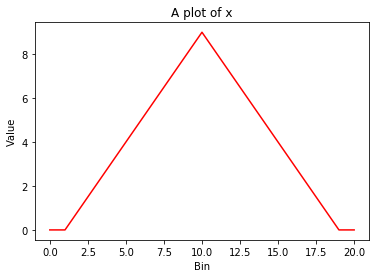

In [ ]:
# Here I plot the contents of the variable x.
figure(1)
plot(x, 'r') # The 'r' parameter tells matplotlib to plot in red.
xlabel('Bin')
ylabel('Value')
title("A plot of x")
show()

Now how about we manipulate the values in $x$, and plot again? before we can do that, lets figure out how to create a loop in Python. The code below simply loops through numbers using the $range$ function. We provide two parameters here - the starting number of the sequence, and the number to generate up to (but not including this number). Here the starting number is 0, and the number to generate up to is 3.

In [ ]:
# A simple loop.
for i in range(0,3):
    print (i)

0
1
2


We can also loop over all the values in $x$.

In [ ]:
for value in x:
    print(value)

0
0
1
2
3
4
5
6
7
8
9
8
7
6
5
4
3
2
1
0
0


Now lets suppose we want to update the values in $x$. What we could do, is loop over each value in $x$ and change it in some way. Say by multiplying it by itself.

In [ ]:
for value in x:
    
    product = value * value
    
print(x)

[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0]


Notice how $x$ hasn't changed above. When we computed the product of $x \times x$, we didn't store it anywhere. It only exists for the duration of the loop in which it is declared. So now, lets update the values correctly and then plot them.

In [ ]:
# We need array indexes so we can modifiy each 'bin' in x.
# Since x contains 21 items, we need to loop over item 1 to
# 21. However arrays in python use zero indexing. This means
# we really need to loop from 0 to 20. Below we use the len()
# function to count the items in x. It returns the value 21. 
# The range function is then used to count from 0 - 20. The range
# function doesn't count up to 21 due to the way it is defined.
for i in range(0,len(x)):
    
    x[i] = x[i]*x[i]
    
print(x)

[0, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 64, 49, 36, 25, 16, 9, 4, 1, 0, 0]


Now we've updated the data, we note that what we have is data describing $x^{2}$ (since we computed $x \times x$). We can now plot $x^{2}$ as follows.

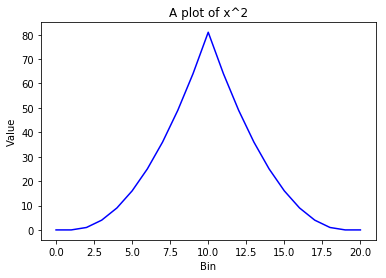

In [ ]:
# Here I plot the contents of the variable x.
figure(2)
plot(x, 'b') # The 'r' parameter tells matplotlib to plot in red.
xlabel('Bin')
ylabel('Value')
title("A plot of x^2")
show()

So far we've only considered 1-d data. What about 2-d data? Suppose we have the following:

In [ ]:
twod = [[1.0, 2.0, 3.0, 1.0], 
       [1.0, 3.0, 1.0, 0.0], 
       [1.0, 4.0, 1.0, 0.0], 
       [1.0, 2.0, 4.0, 1.0], 
       [1.0, 2.0, 1.0, 0.0]]

Lets check the 2-d data's characteristics.

In [ ]:
print(twod)
print("\n")
print("The data object type: ", type (twod))
print("The data object length: ", len(twod))

[[1.0, 2.0, 3.0, 1.0], [1.0, 3.0, 1.0, 0.0], [1.0, 4.0, 1.0, 0.0], [1.0, 2.0, 4.0, 1.0], [1.0, 2.0, 1.0, 0.0]]


The data object type:  <class 'list'>
The data object length:  5


From here we can see that the data is a list, that contains lists! There are 5 lists, and each contains data. Saying a list of lists is another way of saying a matrix. Let’s plot the matrix to visualise what we have.

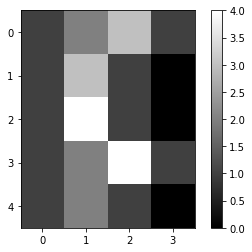

In [ ]:
figure(3)
plt.imshow(twod,cmap='gray')
plt.colorbar()
plt.show()

Right now we have the data as a list of lists. This isn't really practical. Usually we convert this in to a more useable format. For this we use numpy.

In [ ]:
data = np.asarray(twod)

print(data)
print("\n")
print("The data object type: "  , type (data))
print("The data object length: ", len(data))
print("The data object shape: " , len(data))

[[1. 2. 3. 1.]
 [1. 3. 1. 0.]
 [1. 4. 1. 0.]
 [1. 2. 4. 1.]
 [1. 2. 1. 0.]]


The data object type:  <class 'numpy.ndarray'>
The data object length:  5
The data object shape:  5


<br/>

[Back to table of contents.](#Contents)

---

Now we have the data as a matrix, which can make it easier to process.

### <a id="datastandardising"></a>4.3. Standardising Data

Suppose we want to process this data in some way. Perhaps we need the values standardised, which gives the data a zero mean, and unit variance (a variance exactly equal to 1). We can write some code to do this. We'll exploit code from numpy library to make this easy. So let’s import the numpy libraries.


In [ ]:
import numpy as np

Now let’s compute the standardised version of the data in $x$.

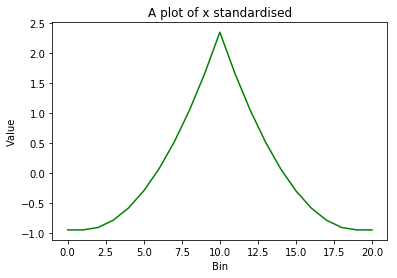

In [ ]:
x = (x - mean(x)) / std(x)

# Here I plot the contents of the variable x.
figure(4)
plot(x, 'g') # The 'r' parameter tells matplotlib to plot in red.
xlabel('Bin')
ylabel('Value')
title("A plot of x standardised")
show()

You can see the maximum value on the y-axis has changed, compared to the first plot we created. Has this process worked correctly, however? Lets check.

In [ ]:
print("The mean of x is: ", mean(x))
print("The standard deviation of x is: ", std(x))

The mean of x is:  2.114710523095536e-17
The standard deviation of x is:  1.0000000000000002


The result above suggests the mean of $x$ isn't quite zero - is this correct? Well, there are an odd number of data items and the mean is almost zero. So this is indeed correct. If we convert the mean value to an integer, we can see this is the case.

In [ ]:
print("The mean of x is: ", int(mean(x)))

The mean of x is:  0


We can see that it is indeed zero. What I did above was cast the data to the integer data type. You must be careful when writing mathematical functions, as if you get casts wrong, your answers will look very weird.

Now, going back to how we standardised the data. Suppose we want to do that again, but for a new data set, $Y$.

In [ ]:
y = [2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2]

Well, we can convert the code we wrote before into a function. Here is a new function that standardises the data.

In [ ]:
def standardise(x):
    """
    Standardise the data so that it has a zero mean, and a unit varience.

    Parameters
    ----------
    N/A

    Returns
    ----------
    N/A
    """
        
    x = (x - mean(x)) / std(x)
    return x

Now lets try this new function out.

In [ ]:
print("Mean of y before standardisation: ", mean(y))
print("Standard deviation of y before standardisation: ", std(y))

standardise(y)

print("\nMean of y after standardisation: ", mean(y))
print("Standard deviation of y after standardisation: ", std(y))

Mean of y before standardisation:  5.379310344827586
Standard deviation of y before standardisation:  2.1239811854392405

Mean of y after standardisation:  5.379310344827586
Standard deviation of y after standardisation:  2.1239811854392405


Notice above I used '\n' to make the output look neater? The '\n' is the newline character. There are other character codes you can try, e.g. '\t' which is tab break.





<br/>

[Back to table of contents.](#Contents)

---


### <a id="pulsardata"></a>4.4. Pulsar Data

Pulsar data is extremely imbalanced. There are typically 10,000 non-target class examples, for every example of interest. In the sections that follow I show how pulsar data can be read, pre-processed, scaled, and machine learning features extracted. This will demonstrate the basic principles behind how we do machine learning in practice.

The input data consists of integrated pulse profiles, collected during the Medium Latitude portion of the High Time Resolution Universe Survey (HTRU) (see Thornton 2013 and Bates et. al. 2012). The data is comprised of $1,586$ pulsar and $8,852$ non-pulsar candidate profiles. Each profile contains exactly 128 phase bins. The data contains 725 of the known 1,108 pulsars (known at the time) in the Medium Latitude survey region (see Levin 2012), along with re-detections and harmonics. The data also contains noise examples, along with strong and weak forms of Radio Frequency Interference (RFI). This data is not to be confused with the [HTRU 2 feature data](https://dx.doi.org/10.6084/m9.figshare.3080389.v1) made available by Lyon et. al. (2016) - the feature data contains only machine learning features extracted from candidates, whilst this data set is made up of integrated pulse profiles only.

### Loading the Data

Here we simply load in the integrated pulse profile data, from files in the provided distribution. There are two files to be read in. The first contains integrated profiles for pulsars, the second contains noise and RFI profiles.

In [32]:
# Plotting library.
import matplotlib.pyplot as plt

# For some math we need to do.
import numpy as np

# The HTRU 2 profile data is split - one file containing the real pulsar
# profiles, one file containing noise/interference profiles. We load both
# these data sources here. First we construct relative paths to the files.
data_dir = 'data/HTRU2'
pulsar_file = data_dir + '/HTRU2_pulsar.csv'
nonpulsar_file = data_dir + '/HTRU2_nonpulsar.csv'

# Now simply load the data.
pulsar_data = np.genfromtxt(pulsar_file, dtype=np.int,delimiter=',')
non_pulsar_data = np.genfromtxt(nonpulsar_file, dtype=np.int,delimiter=',')

# Print overview details.
print ('\n\nTotal number of pulsar profiles: ', len(pulsar_data))
print ('Total number of noise/RFI profiles: ', len(non_pulsar_data))



Total number of pulsar profiles:  1586
Total number of noise/RFI profiles:  8852


Now we plot a single example of both classes, to show what the data looks like. First the pulsar example.

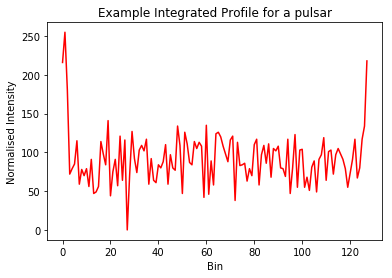

In [33]:
plt.figure(1)
plt.plot(pulsar_data[7], 'r')
plt.xlabel('Bin')
plt.ylabel('Normalised Intensity')
plt.title('Example Integrated Profile for a pulsar')
plt.show()

It is clear that the peak is not in the centre. For most examples it is, but not for all. How about for the non-pulsar examples?

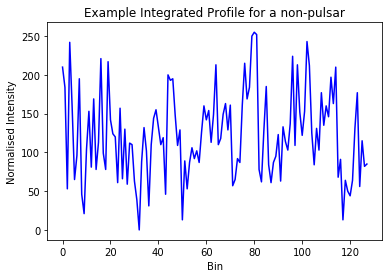

In [34]:
plt.figure(2)
plt.plot(non_pulsar_data[0], 'b')
plt.xlabel('Bin')
plt.ylabel('Normalised Intensity')
plt.title('Example Integrated Profile for a non-pulsar')
plt.show()

<br/>

[Back to table of contents.](#Contents)

---

### <a id="datapreprocessing"></a>4.5. Data Pre-processing

The non-pulsar example doesn't appear to be correctly centred either. So we centre the data using a simple function. We define this function below:

In [35]:
import operator

def centre_on_peak(data):
    """
    Centre the data such that the maximum y-axis value is in the
    centre of the data.

    Parameters
    ----------
    :param data: the data to be centred.

    Returns
    ----------
    :return: the centred data array.
    """
    # Stores the centred data.
    centred_data = []

    # Get the index of the maximum value.
    index, value = max(enumerate(data), key=operator.itemgetter(1))

    # Find midpoint of the data.
    midpoint = int(len(data)/2)

    # Figure out the shift required to centre the data (put max value in centre bin).
    n = midpoint - index  # N gives the number of bins the data should be shifted.
    a = n % len(data)

    # Apply the correction.
    centred_data = np.concatenate([data[-a:],data[:-a]])

    return centred_data

Now we execute this centering function.

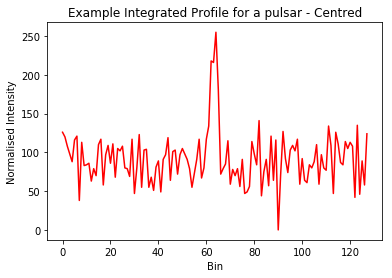

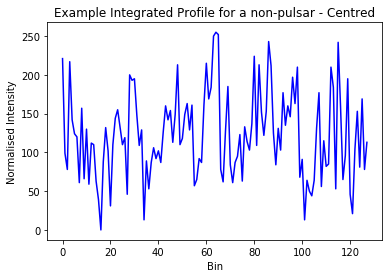

In [36]:
# Here we simply loop over each item in the data arrays,
# and update their values.
for i in range(0, len(pulsar_data)):
    pulsar_data[i] = centre_on_peak(pulsar_data[i])
    
for i in range(0, len(non_pulsar_data)):
    non_pulsar_data[i] = centre_on_peak(non_pulsar_data[i])
    
plt.figure(3)
plt.plot(pulsar_data[7], 'r')
plt.xlabel('Bin')
plt.ylabel('Normalised Intensity')
plt.title('Example Integrated Profile for a pulsar - Centred')
plt.show()

plt.figure(4)
plt.plot(non_pulsar_data[0], 'b')
plt.xlabel('Bin')
plt.ylabel('Normalised Intensity')
plt.title('Example Integrated Profile for a non-pulsar - Centred')
plt.show()

Now the data is correctly loaded and centred, we can move on. How about we compute some machine learning features from the data? We can use the features devised by Lyon et.al. 2016. The code provided below will allow us to extract these.

### Scaling
Pulsar data is often scaled to some nuermical range, often 0 to 255. Here I provide a function that can perform the scaling.

In [40]:
def scale(data,new_min, new_max):
    """
    Scales data to within the range [new_min,new_max].

    Parameters
    ----------
    :param data: the data to scale.
    :param new_min: the new minimum value for the data range.
    :param new_max: the new maximum value for the data range.

    Returns
    ----------
    :return: A new array with the data scaled to within the range [new_min,new_max].
    """
    min_ = min(data)
    max_ = max(data)

    new_data = []

    for n in range(len(data)):

        value = data[n]
        x = (new_min * (1-( (value-min_) /( max_- min_ )))) + (new_max * ( (value-min_) /( max_- min_ ) ))
        new_data.append(x)

    return new_data

<br/>

[Back to table of contents.](#Contents)

---

### <a id="featureextraction"></a>4.6. Feature Extraction

In [37]:
def compute_features(data):
    """
    Computes machine learning feature values for the supplied data array.

    Parameters
    ----------
    :param data: a data array.

    Returns
    ----------
    :return: the computed machine learning features as a list [mean, stdev, shew, kurtosis].
    """
    if data is not None:  # Check data is not empty

        if len(data) > 0:

            # Sums computed during calculation.
            mean_sum = 0
            mean_subtracted_sum_power_2 = 0
            mean_subtracted_sum_power_3 = 0
            mean_subtracted_sum_power_4 = 0

            # The number of data points in the array.
            n = len(data)

            # Necessary first loop to calculate the sum, min and max
            for d in data:
                mean_sum += float(d)
            
            if mean_sum > 0 or mean_sum < 0:  # If the mean is less than or greater than zero (should be)
                
                # Update the mean value.
                mean_value = mean_sum / float(n)

                # Now try to compute the standard deviation, using
                # the mean computed above... we also compute values in
                # this loop required to compute the excess Kurtosis and
                # standard deviation.

                for d in data:
                    
                    mean_subtracted_sum_power_2 += np.power((float(d) - mean_value), 2.0)

                    # Used to compute skew
                    mean_subtracted_sum_power_3 += np.power((float(d) - mean_value), 3.0)

                    # Used to compute Kurtosis
                    mean_subtracted_sum_power_4 += np.power((float(d) - mean_value), 4.0)

                # Update the standard deviation value.
                stdev = np.sqrt(mean_subtracted_sum_power_2 / (n - 1.0))
                # Next try to calculate the excess Kurtosis and skew using the
                # information gathered above.

                one_over_n = 1.0 / n  # Used multiple times...

                kurt = ((one_over_n * mean_subtracted_sum_power_4) / np.power((one_over_n * mean_subtracted_sum_power_2), 2) ) - 3

                skew = (one_over_n * mean_subtracted_sum_power_3) / np.power(np.sqrt(one_over_n * mean_subtracted_sum_power_2), 3)
                    
                return [mean_value, stdev, skew, kurt]
                
            else:  # Data sums to zero, i.e. no data!
                return [0,0,0,0]
            
        else:  # Data empty for some reason...
            return [0,0,0,0]

### Feature Extraction Unit Test
Now we want to test our feature extraction function works correctly. To do this, we write two important types of test.

#### Test 1: Expected Outputs from Theory
A Gaussian distribution with a mean of 0, and a standard deviation of 1, should have a skew of 0, and a kurtosis of 0. These values are derivable from theory, and are known to be correct. We can test our function works well, by comparing the values it computes for such a Gaussian distribution. However, I don't have the data points describing a perfect Gaussian distribution readily at hand. So to perform such a test, I use a simple trick. I instead use a Gaussian random number generator, to generate an approximately perfect distribution. I can then compare the outputs of my function computed over this distribution, to the expected values from theory. Whilst the results will not match exactly, it should give us an indication of how the function is performing.

#### Test 2: Our output vs. Numpy
We can also compare the values obtained by our function, to those produced by the in-built numpy functions. If our function produces outputs close to those expected from theory, and identical to those produced by numpy, we can have confidence that our function is correct.

At this point, you may wonder why I bother with the comparison to the theoretical. Perhaps you're thinking, *"Geez Rob, why not just compare to the numpy function?"*. Well, sometimes numpy functions have bugs, and we need to be sure that we are robust against them.


Ok, now we perform the first two test for a approximately perfect Gaussian distribution. Note that we use the sample standard deviation, and values are rounded to 12 decimal places.

In [38]:
import random as rnd
from scipy.stats import skew
from scipy.stats import kurtosis

# Now generate some random data, and test the extracted values.
gaussian_data = []
for i in range(0, 100000):
    gaussian_data.append(rnd.gauss(0.0, 1.0))

# Get the feature data
[mean_,stdev_,skew_,kurt_] = compute_features(gaussian_data)

# Check the results
print ('Test 1 for Gaussian Distribution: Our computed values vs. theoretical values\n')
print ('\tGaussian data mean: ' , str('%.12f' % mean_) , '\t\texpected: 0.0')
print ('\tGaussian data stdev:' , str('%.12f' % stdev_), '\t\texpected: 1.0')
print ('\tGaussian data skew: ' , str('%.12f' % skew_) , '\t\texpected: 0.0')
print ('\tGaussian data kurt: ' , str('%.12f' % kurt_) , '\t\texpected: 0.0\n\n')

# Check the results
print ('Test 2 for Gaussian Distribution: Our computed values vs. numpy function values\n')
print ('\tGaussian data mean: ' , str('%.12f' % mean_) , '\t\tnumpy: ' , str('%.12f' % np.mean(gaussian_data)))
print ('\tGaussian data stdev:' , str('%.12f' % stdev_) , '\t\tnumpy: ' , str('%.12f' % np.std(gaussian_data,ddof=1)))
print ('\tGaussian data skew: ' , str('%.12f' % skew_) , '\t\tnumpy: ' , str('%.12f' % skew(gaussian_data)))
print ('\tGaussian data kurt: ' , str('%.12f' % kurt_) , '\t\tnumpy: ' , str('%.12f' % kurtosis(gaussian_data)), '\n\n')

Test 1 for Gaussian Distribution: Our computed values vs. theoretical values

	Gaussian data mean:  -0.001636820986 		expected: 0.0
	Gaussian data stdev: 1.000969581305 		expected: 1.0
	Gaussian data skew:  -0.010071590652 		expected: 0.0
	Gaussian data kurt:  0.006428201885 		expected: 0.0


Test 2 for Gaussian Distribution: Our computed values vs. numpy function values

	Gaussian data mean:  -0.001636820986 		numpy:  -0.001636820986
	Gaussian data stdev: 1.000969581305 		numpy:  1.000969581305
	Gaussian data skew:  -0.010071590652 		numpy:  -0.010071590652
	Gaussian data kurt:  0.006428201885 		numpy:  0.006428201885 




It's clear that the function is producing values very close to those expected from the theory. It is also clear that our function is giving the same answers to the numpy function. So it appears to be working well. Now for another test, this time on the uniform distribution.

In [39]:
# Now generate some random data, and test the extracted values.
uniform_data = []
for i in range(0, 100000):
    uniform_data.append(rnd.uniform(0.0, 1.0))

[mean_,stdev_,skew_,kurt_] = compute_features(uniform_data)
        
# Standard deviation of uniform distribution is given by:
#
# Sqrt((1/12) (b-a)^2)
#
# where a is the lower limit, and b the upper limit. So...
expected_std = np.sqrt((1.0/12.0) * np.power((1.0-0.0), 2))

# Kurtosis of uniform distribution is given by:
#
# -(6.0/5.0)
expected_kurt = -(6.0/5.0)

# Skew of uniform distribution is given by:
#
# 0
expected_skew = 0

# See this site for details on these computations:
# http:#mathworld.wolfram.com/UniformDistribution.html

# Check the results
print ('Test 1 for Uniform Distribution: Our computed values vs. theoretical values\n')
print ('\tUniform data mean: ' , str('%.12f' % mean_) , '\t\texpected: 0.5')
print ('\tUniform data stdev:' , str('%.12f' % stdev_), '\t\texpected: ' , str(expected_std))
print ('\tUniform data skew: ' , str('%.12f' % skew_) , '\t\texpected: ' , str(expected_skew))
print ('\tUniform data kurt: ' , str('%.12f' % kurt_) , '\t\texpected: ' , str(expected_kurt) , '\n\n')

# Check the results
print ('Test 2 for Uniform Distribution: Our computed values vs. numpy function values\n')
print ('\tUniform data mean: ' , str('%.12f' % mean_) , '\t\tnumpy: ' , str('%.12f' % np.mean(uniform_data)))
print ('\tUniform data stdev:' , str('%.12f' % stdev_), '\t\tnumpy: ' , str('%.12f' % np.std(uniform_data,ddof=1)))
print ('\tUniform data skew: ' , str('%.12f' % skew_) , '\t\tnumpy: ' , str('%.12f' % skew(uniform_data)))
print ('\tUniform data kurt: ' , str('%.12f' % kurt_) , '\t\tnumpy: ' , str('%.12f' % kurtosis(uniform_data)))

Test 1 for Uniform Distribution: Our computed values vs. theoretical values

	Uniform data mean:  0.500053760973 		expected: 0.5
	Uniform data stdev: 0.287984271227 		expected:  0.288675134595
	Uniform data skew:  0.002904046338 		expected:  0
	Uniform data kurt:  -1.196982538612 		expected:  -1.2 


Test 2 for Uniform Distribution: Our computed values vs. numpy function values

	Uniform data mean:  0.500053760973 		numpy:  0.500053760973
	Uniform data stdev: 0.287984271227 		numpy:  0.287984271227
	Uniform data skew:  0.002904046338 		numpy:  0.002904046338
	Uniform data kurt:  -1.196982538612 		numpy:  -1.196982538612


It's clear that the function is producing values very close to those expected from the theory. It is also clear that our function is giving the same answers to the numpy function. Based on these results, I trust that the function is correct.


<br/>

[Back to table of contents.](#Contents)

---

### <a id="buildingtrainandtest"></a>4.7. Building Training & Test Sets

## Pulsar Classification
So far we've loaded the pulsar data, decided upon a scaling, and chosen our features. Now lets do some basic classification.

In [41]:
from sklearn.model_selection import train_test_split
    
X = [] # Stores the feature data.
Y = [] # Stores the class labels.

# Add pulsar examples.
for i in range(0, len(pulsar_data)):
    
    # Now here we extract the features with the call
    # to compute_features(). We also scale each profile
    # so that its values fall in the range [0,1]. This is
    # done via the call to scale(...).
    X.append(compute_features(scale(pulsar_data[i],0.0,1.0)))
    Y.append(1)

# Add non-pulsar examples.
for i in range(0, len(non_pulsar_data)):
             
    # Now here we extract the features with the call
    # to compute_features(). We also scale each profile
    # so that its values fall in the range [0,1]. This is
    # done via the call to scale(...).
    X.append(compute_features(scale(non_pulsar_data[i],0.0,1.0)))
    Y.append(0)

Now let's create a test/train data set split.

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.999)

print ('\nExamples in training set: ' , str(len(x_train)))
print ('Examples in testing set: ' , str(len(x_test)))
             
# There should be 4 features per example. Lets just check this is
# the case.
print ('Dimensions of training set: ' , str(np.asarray(x_train).shape))
print ('Dimensions of testing set: ' , str(np.asarray(x_test).shape))    


Examples in training set:  10
Examples in testing set:  10428
Dimensions of training set:  (10, 4)
Dimensions of testing set:  (10428, 4)


<br/>

[Back to table of contents.](#Contents)

---

### <a id="builingclassifiers"></a>4.8. Building Classifiers

Now we build and test the classifier. We'll just use a basic calssfier here to keep things simple.

In [43]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

# First train the classifier with call to fit.
classifier.fit(x_train, y_train)

# Now obtain the classifiers 'score'
accuracy = classifier.score(x_test, y_test)
print ("Naive Bayes Classifier accuracy: ", (100* accuracy), "%.")

Naive Bayes Classifier accuracy:  95.3778289221 %.


Here we've built a basic classifier on just the integrated pulse profile data of pulsar candidates. The results are quite good - however in the real world things aren't so easy. Stay tuned for more datasets that I'll be able to share - perhaps then you'll find out how tricky pulsar classification is.

<br/>

[Back to table of contents.](#Contents)

---

### <a id="evaluatingclassifiers"></a>4.9. Evaluating Classifiers

<br/>

[Back to table of contents.](#Contents)

---

# <a id="references"></a>5. References

[[1](https://www.theguardian.com/technology/2018/jul/25/ai-artificial-intelligence-social-media-bots-wrong)] Oscar Schwartz, "'The discourse is unhinged': how the media gets AI alarmingly wrong", The Guardian, 2018, URL: https://www.theguardian.com/technology/2018/jul/25/ai-artificial-intelligence-social-media-bots-wrong

[[2](https://www.theverge.com/2019/1/28/18197520/ai-artificial-intelligence-machine-learning-computational-science)] James Vincent, "The State of AI in 2019", The Verge, 2019, URL: https://www.theverge.com/2019/1/28/18197520/ai-artificial-intelligence-machine-learning-computational-science

[[3](https://www.forbes.com/sites/erikaandersen/2013/10/04/it-seemed-like-a-good-idea-at-the-time-7-of-the-worst-business-decisions-ever-made/)] Erika Anderson, "It Seemed Like A Good Idea At The Time: 7 Of The Worst Business Decisions Ever Made", Forbes, 2013, URL: https://www.forbes.com/sites/erikaandersen/2013/10/04/it-seemed-like-a-good-idea-at-the-time-7-of-the-worst-business-decisions-ever-made/

[[4](https://www.cnbc.com/2018/12/05/sell-offs-could-be-down-to-machines-that-control-80percent-of-us-stocks-fund-manager-says.html)] Silvia Amaro, "Sell-offs could be down to machines that control 80% of the US stock market, fund manager says", CNBC, 2018, URL: https://www.cnbc.com/2018/12/05/sell-offs-could-be-down-to-machines-that-control-80percent-of-us-stocks-fund-manager-says.html 

[[5](http://news.mit.edu/2018/machine-learning-financial-credit-card-fraud-0920)] Rob Matheson, "Reducing false positives in credit card fraud detection" , MIT News Office, 2018, URL: http://news.mit.edu/2018/machine-learning-financial-credit-card-fraud-0920

[[6](https://www.forbes.com/sites/nicolemartin1/2019/10/18/how-artifical-intelligence-is-advancing-precision-medicine/)] Nicole Martin, "How Artifical Intelligence Is Advancing Precision Medicine", Forbes, 2019, URL: https://www.forbes.com/sites/nicolemartin1/2019/10/18/how-artifical-intelligence-is-advancing-precision-medicine/

[[7](https://artificialintelligence-news.com/2019/06/18/volvo-nvidia-assist-ai-self-driving-vehicles/)] Ryan Daws, "Volvo picks up Nvidia to assist with AI for self-driving vehicles", AI News, 2019, URL: https://artificialintelligence-news.com/2019/06/18/volvo-nvidia-assist-ai-self-driving-vehicles/

[[8](http://www.sportspromedia.com/news/liverpool-fc-skillcorner-ai-data-analysis)] Tom Bassam, "Liverpool partner with SkillCorner for AI-powered analysis", SportsPRO, 2019, URL: http://www.sportspromedia.com/news/liverpool-fc-skillcorner-ai-data-analysis

[[9](https://phys.org/news/2019-08-team-ai-fast-radio.html)] Katherine Moody, "Team uses AI to detect fast radio bursts", Phys.org , 2019, URL: https://phys.org/news/2019-08-team-ai-fast-radio.html
